In [74]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [75]:
data = pd.read_csv("/content/PCOS_data.csv")

In [76]:
data.sample(4)

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
30       31                31           0          32         50.0   
514     515               515           0          32         65.0   
176     177               177           1          28         78.0   
38       39                39           0          36         53.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
30       155.000  20.8           17                78                22   
514      170.688  22.3           16                72                18   
176      158.000  31.2           16                73                18   
38       158.000  21.2           13                78                22   

     Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  \
30       10.8           2                   4                    3.5   
514      10.5           2                   5                    6.0   
176      10.5           2                   4                    8.0   
38       11.0           2                   5                   17.0   

     Pregnant(Y/N)  No. of abortions    I   beta-HCG(mIU/mL)  \
30               1                 0                  612.32   
514              0                 0                  171.85   
176              0                 0                    3.66   
38               0                 0                   10.00   

     II    beta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  \
30                    12.00         6.34        4.07    1.56         34   
514                    1.99         7.45        2.86    2.60         38   
176                    1.65         4.50        2.77    1.62         42   
38                     1.99         3.99        1.99    2.01         39   

     Waist(inch)  Waist:Hip Ratio  TSH (mIU/L)  AMH(ng/mL)  PRL(ng/mL)  \
30            28             0.82        1.400        1.69       54.09   
514           36             0.95        2.970       18.90       21.04   
176           38             0.90        4.040        9.00       20.76   
38            32             0.82        2.376        2.36       19.64   

     Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  \
30            56.20        0.31        80.0                 0   
514           30.00        0.49       100.0                 0   
176           10.22        0.26       108.0                 1   
38            45.55        0.65       100.0                 0   

     hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
30                  0                     0               0             0   
514                 0                     0               0             0   
176                 1                     1               1             0   
38                  0                     0               0             0   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
30               0.0                  0                  110   
514              1.0                  0                  110   
176              1.0                  0                  110   
38               0.0                  0                  110   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
30                     80                10                 8   
514                    70                 9                 7   
176                    70                15                14   
38                     80                 7                 5   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm) Unnamed: 44  
30                   14.0                  14.0               7.0         NaN  
514                  18.0                  18.0               9.0         NaN  
176                  14.0                  12.0               8.0         NaN  
38                    8.0                   7.0              15.0         NaN

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [78]:
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [79]:
df = data.drop(["Sl. No", "Patient File No.",  "Unnamed: 44"], axis=1) # unnecessary columns removed

In [80]:
df["PCOS (Y/N)"].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [81]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [82]:
df.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)
df.rename(columns={'Marraige Status (Yrs)': 'Marriage Status (Yrs)'}, inplace=True)
df.rename(columns={'Pulse rate(bpm) ': 'Pulse rate(bpm)'}, inplace=True)
df.rename(columns={'II    beta-HCG(mIU/mL)': 'II_beta_HCG(mIU/mL)'}, inplace=True)
df.rename(columns={' Age (yrs)': 'Age (yrs)'}, inplace=True)
df.rename(columns={'  I   beta-HCG(mIU/mL)': 'I_beta_HCG(mIU/mL)'}, inplace=True)

df.rename(columns={'No. of abortions': 'No_of_abortions'}, inplace=True)
df.rename(columns={'BP _Systolic (mmHg)': 'BP_Systolic(mmHg)'}, inplace=True)

df.rename(columns={'BP _Diastolic (mmHg)': 'BP_Diastolic(mmHg)'}, inplace=True)
df.rename(columns={'Waist:Hip Ratio': 'WaistHip_Ratio'}, inplace=True)

In [83]:
df[df["II_beta_HCG(mIU/mL)"] == '1.99.']

Empty DataFrame
Columns: [PCOS (Y/N), Age (yrs), Weight (Kg), Height(Cm), BMI, Blood Group, Pulse rate(bpm), RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days), Marriage Status (Yrs), Pregnant(Y/N), No_of_abortions, I_beta_HCG(mIU/mL), II_beta_HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch), Waist(inch), WaistHip_Ratio, TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), BP_Systolic(mmHg), BP_Diastolic(mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)]
Index: []

In [84]:
# It was edited because it was an expression written as
df.loc[df['II_beta_HCG(mIU/mL)'] == '1.99.', 'II_beta_HCG(mIU/mL)'] = 1.99

In [85]:
df[df["II_beta_HCG(mIU/mL)"] == '1.99.'] # check

Empty DataFrame
Columns: [PCOS (Y/N), Age (yrs), Weight (Kg), Height(Cm), BMI, Blood Group, Pulse rate(bpm), RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days), Marriage Status (Yrs), Pregnant(Y/N), No_of_abortions, I_beta_HCG(mIU/mL), II_beta_HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch), Waist(inch), WaistHip_Ratio, TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), BP_Systolic(mmHg), BP_Diastolic(mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)]
Index: []

In [86]:
df[df['AMH(ng/mL)'] == 'a']

Empty DataFrame
Columns: [PCOS (Y/N), Age (yrs), Weight (Kg), Height(Cm), BMI, Blood Group, Pulse rate(bpm), RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days), Marriage Status (Yrs), Pregnant(Y/N), No_of_abortions, I_beta_HCG(mIU/mL), II_beta_HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch), Waist(inch), WaistHip_Ratio, TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), BP_Systolic(mmHg), BP_Diastolic(mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)]
Index: []

In [87]:
df[df.index == 305]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
305           0         37         56.0       152.0  24.2           13   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
305               74                20      11.7           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
305                   5                    9.0              0   

     No_of_abortions  I_beta_HCG(mIU/mL)  II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
305                0                42.0                 1.99         2.91   

     LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
305        0.35    8.31         35           33            0.94         16.0   

     AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
305         1.0        2.22            38.6         0.3       100.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
305                 0                 0                     0               0   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
305             1              0.0                  1                120   

     BP_Diastolic(mmHg)  Follicle No. (L)  Follicle No. (R)  \
305                  70                 4                 5   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
305                  17.0                  16.0               5.6

In [88]:
df.loc[df['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan # filled in as missing value

In [89]:
df[df.index == 305] # check

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
305           0         37         56.0       152.0  24.2           13   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
305               74                20      11.7           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
305                   5                    9.0              0   

     No_of_abortions  I_beta_HCG(mIU/mL)  II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
305                0                42.0                 1.99         2.91   

     LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
305        0.35    8.31         35           33            0.94         16.0   

     AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
305         1.0        2.22            38.6         0.3       100.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
305                 0                 0                     0               0   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
305             1              0.0                  1                120   

     BP_Diastolic(mmHg)  Follicle No. (L)  Follicle No. (R)  \
305                  70                 4                 5   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
305                  17.0                  16.0               5.6

In [90]:
df['II_beta_HCG(mIU/mL)'] = pd.to_numeric(df['II_beta_HCG(mIU/mL)'], errors='coerce').astype('float64')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce').astype('float64')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marriage Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No_of_abortions        541 non-null    int64  
 14  I_beta_HCG(mIU/mL)     541 non-null    float64
 15  II_bet

In [92]:
df.quantile([0, 0.8, 0.9, 0.97, 0.98, 0.99, 1]).T # Let's examine the distribution of the data

0.00    0.80    0.90      0.97       0.98  \
PCOS (Y/N)               0.000    1.00    1.00     1.000     1.0000   
Age (yrs)               20.000   36.00   38.00    42.000    44.0000   
Weight (Kg)             31.000   68.00   74.00    83.000    85.0000   
Height(Cm)             137.000  161.50  164.50   169.800   170.1376   
BMI                     12.400   27.40   29.20    32.000    32.9000   
Blood Group             11.000   15.00   16.00    17.000    17.0000   
Pulse rate(bpm)         13.000   74.00   78.00    80.000    80.0000   
RR (breaths/min)        16.000   20.00   22.00    22.000    24.0000   
Hb(g/dl)                 8.500   12.00   12.40    13.160    13.2000   
Cycle(R/I)               2.000    4.00    4.00     4.000     4.0000   
Cycle length(days)       0.000    6.00    6.00     8.800     9.0000   
Marriage Status (Yrs)    0.000   12.00   14.00    18.000    19.2200   
Pregnant(Y/N)            0.000    1.00    1.00     1.000     1.0000   
No_of_abortions          0.000    0.00    1.00     2.000     3.0000   
I_beta_HCG(mIU/mL)       1.300  375.18  658.29  2043.480  5764.6700   
II_beta_HCG(mIU/mL)      0.990  158.51  403.85   785.432  1093.1360   
FSH(mIU/mL)              0.210    6.73    7.78    10.010    11.2200   
LH(mIU/mL)               0.020    4.11    5.57     8.658     9.5740   
FSH/LH                   0.000    4.87    7.33    17.580    21.3680   
Hip(inch)               26.000   41.00   42.00    45.000    46.0000   
Waist(inch)             24.000   36.00   38.00    41.000    42.0000   
WaistHip_Ratio           0.760    0.94    0.95     0.968     0.9700   
TSH (mIU/L)              0.040    3.90    5.00     8.094    10.9040   
AMH(ng/mL)               0.100    8.50   12.70    19.240    20.5200   
PRL(ng/mL)               0.400   32.06   40.43    54.876    63.5340   
Vit D3 (ng/mL)           0.000   36.85   45.60    59.824    62.1000   
PRG(ng/mL)               0.047    0.49    0.66     0.980     1.0000   
RBS(mg/dl)              60.000  108.00  116.00   133.000   138.0000   
Weight gain(Y/N)         0.000    1.00    1.00     1.000     1.0000   
hair growth(Y/N)         0.000    1.00    1.00     1.000     1.0000   
Skin darkening (Y/N)     0.000    1.00    1.00     1.000     1.0000   
Hair loss(Y/N)           0.000    1.00    1.00     1.000     1.0000   
Pimples(Y/N)             0.000    1.00    1.00     1.000     1.0000   
Fast food (Y/N)          0.000    1.00    1.00     1.000     1.0000   
Reg.Exercise(Y/N)        0.000    1.00    1.00     1.000     1.0000   
BP_Systolic(mmHg)       12.000  120.00  120.00   120.000   120.0000   
BP_Diastolic(mmHg)       8.000   80.00   80.00    80.000    80.0000   
Follicle No. (L)         0.000   10.00   12.00    15.000    16.0000   
Follicle No. (R)         0.000   10.00   12.00    16.000    18.0000   
Avg. F size (L) (mm)     0.000   18.00   19.00    20.000    20.0000   
Avg. F size (R) (mm)     0.000   18.00   19.00    20.000    21.0000   
Endometrium (mm)         0.000   10.00   11.00    13.000    13.6000   

                            0.99      1.00  
PCOS (Y/N)                 1.000      1.00  
Age (yrs)                 45.000     48.00  
Weight (Kg)               89.000    108.00  
Height(Cm)               172.000    180.00  
BMI                       35.500     38.90  
Blood Group               17.000     18.00  
Pulse rate(bpm)           80.000     82.00  
RR (breaths/min)          24.000     28.00  
Hb(g/dl)                  13.800     14.80  
Cycle(R/I)                 4.000      5.00  
Cycle length(days)        11.000     12.00  
Marriage Status (Yrs)     23.000     30.00  
Pregnant(Y/N)              1.000      1.00  
No_of_abortions            3.000      5.00  
I_beta_HCG(mIU/mL)     23790.916  32460.97  
II_beta_HCG(mIU/mL)     3675.912  25000.00  
FSH(mIU/mL)               15.266   5052.00  
LH(mIU/mL)                10.650   2018.00  
FSH/LH                    31.212   1372.83  
Hip(inch)                 48.000     48.00  
Waist(inch)               4

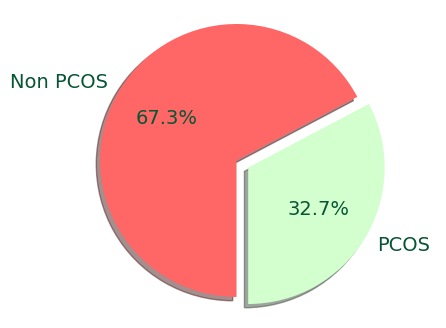

In [93]:
PCOS=df[df['PCOS (Y/N)']==1].shape[0]
non_PCOS= df[df['PCOS (Y/N)']==0].shape[0]

slices=[PCOS,non_PCOS]
labels=['PCOS','Non PCOS']
explode=[0.1,0]

colors = ['#d3ffce', '#ff6666']
#794044  #065535

fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(slices, explode=explode,colors= colors, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270,textprops={'fontsize': 14,'color':"#065535"})
ax1.axis('equal')
plt.show()

<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

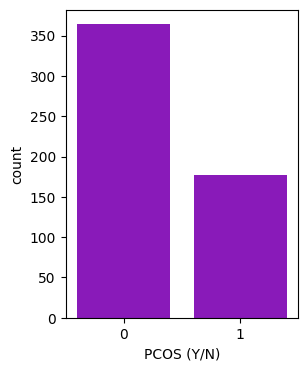

In [94]:
plt.figure(figsize=(3,4))
sns.countplot(data=df, x='PCOS (Y/N)', color="darkviolet")
#plt.xticks(rotation=90)

<Axes: xlabel='Age (yrs)', ylabel='Marriage Status (Yrs)'>

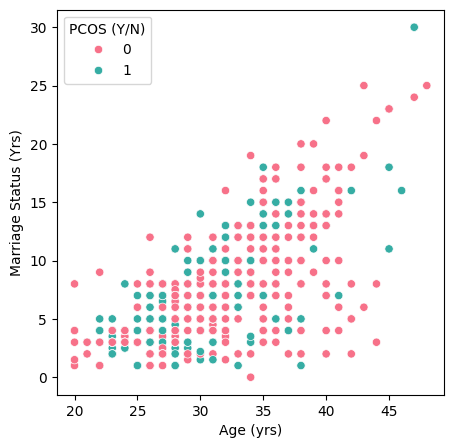

In [95]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="Age (yrs)", y="Marriage Status (Yrs)", data=df, hue='PCOS (Y/N)', palette='husl')

In [96]:
df[df["Age (yrs)"] <= 22]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
10            0         20         71.0     163.000  26.7           15   
27            0         20         68.0     152.000  29.4           17   
39            0         20         74.0     171.000  25.3           13   
88            1         22         69.5     168.000  24.6           13   
95            1         22         50.0     155.000  20.8           15   
110           0         21         59.0     150.000  26.2           15   
122           1         22         79.0     155.000  32.9           11   
132           1         22         60.0     154.000  25.3           15   
231           0         22         78.0     154.000  32.9           15   
239           0         20         56.0     159.000  22.2           13   
297           0         20         52.0     150.000  23.1           15   
336           1         21         82.0     158.000  32.8           16   
350           0         22         56.0     154.000  23.6           13   
367           0         20         64.0     165.000  23.5           15   
368           1         22         58.0     161.000  22.4           13   
513           0         21         55.0     158.496  21.9           16   
527           0         22         62.0     162.000  23.6           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
10                80                20      10.0           2   
27                72                20      10.0           4   
39                74                16      11.1           4   
88                74                20      12.5           4   
95                80                20      12.1           2   
110               72                18      11.2           4   
122               72                18      11.3           2   
132               70                18      12.7           2   
231               72                18      12.4           2   
239               72                18      12.4           2   
297               72                18      10.5           2   
336               78                24      10.6           4   
350               72                18      10.8           2   
367               72                18      11.5           2   
368               74                22      10.0           4   
513               72                18      11.5           2   
527               74                22      11.1           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
10                    5                    4.0              1   
27                    3                    4.0              1   
39                    0                    1.0              0   
88                    2                    3.0              0   
95                    5                    1.0              1   
110                   6                    2.0              1   
122                   5                    4.0              0   
132                   5                    4.0              0   
231                   5                    9.0              0   
239                   5                    1.5              1   
297                   6                    3.0              0   
336                   3                    3.0              1   
350                   6                    1.0              1   
367                   6                    8.0              1   
368                   3                    5.0              1   
513                   5                    3.0              0   
527                   4                    3.0              0   

     No_of_abortions  I_beta_HCG(mIU/mL)  II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
10                 2              158.51               158.51         4.89   
27                 0              689.58                11.24         1.80   
39                 0                1.99                 1.99         3.52   
88                 0                

In [97]:
df[df["I_beta_HCG(mIU/mL)"] >= df["I_beta_HCG(mIU/mL)"].quantile(0.99)]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
110           0         21         59.0       150.0  26.2           15   
111           0         26         75.0       170.0  26.0           15   
214           0         29         63.0       152.0  27.3           11   
252           1         47         62.7       154.0  26.4           15   
446           0         29         63.0       162.0  24.0           11   
447           1         47         62.7       160.0  24.5           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
110               72                18      11.2           4   
111               72                18      11.2           4   
214               72                18      13.2           2   
252               72                18      10.0           4   
446               72                18      13.2           2   
447               72                18      10.0           4   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
110                   6                    2.0              1   
111                   2                    3.0              1   
214                   6                   11.0              1   
252                   4                   30.0              1   
446                   5                   11.0              0   
447                   7                   30.0              0   

     No_of_abortions  I_beta_HCG(mIU/mL)  II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
110                0            26290.26              3350.19         4.13   
111                0            32460.97                97.63         6.21   
214                4            25000.00               475.04         1.99   
252                2            25000.00             25000.00         1.88   
446                0            30004.00               475.04         1.99   
447                0            30007.00                 1.99         1.88   

     LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
110        5.11    0.81         41           34            0.83         1.26   
111        2.18    2.85         40           34            0.85         2.44   
214        1.61    1.24         38           34            0.89         1.77   
252        0.25    7.52         38           36            0.95         2.47   
446        1.61    1.24         39           37            0.95         1.77   
447        0.25    7.52         39           36            0.92         2.47   

     AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
110       21.90       13.97            33.4        1.00       125.0   
111        1.60       21.48            25.3        0.28       100.0   
214        5.96       21.95            22.7        0.46        95.0   
252        6.20       31.47            12.1        0.25        92.0   
446        5.96       21.95            22.7        0.46        95.0   
447        6.20       31.47            12.1        0.25        92.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
110                 0                 0                     1               1   
111                 0                 1                     1               1   
214                 1                 0                     0               1   
252                 1                 1                     1               1   
446                 0                 1                     1               0   
447                 0                 0                     0               0   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
110             0              0.0                  1                100   
111             0              1.0                  1                120   
214             1              1.0                  0                110   
252             0              0.0                  0                110   
446             0          

<Axes: xlabel='Age (yrs)', ylabel='No_of_abortions'>

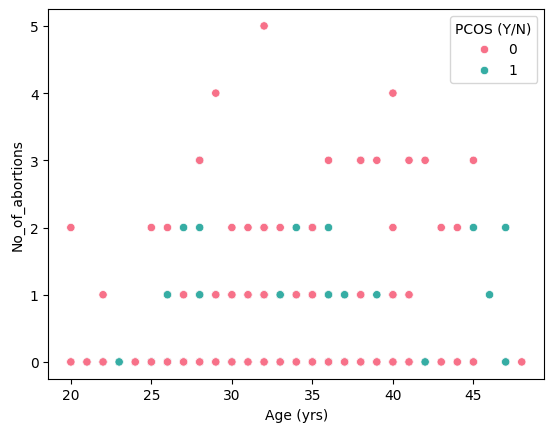

In [98]:
sns.scatterplot(x="Age (yrs)", y="No_of_abortions", data=df, hue='PCOS (Y/N)', palette='husl')

In [99]:
weight = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==0)] # 100
skin = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==0)] # 010
weight_skin = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==0)] # 110

hairLoss = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==1)] # 001
weight_hairLoss = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==1)] # 101
skin_hairLoss = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==1)] # 011

all_3 = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==1)] # 111

In [100]:
weight.shape, skin.shape, hairLoss.shape

((41, 42), (37, 42), (96, 42))

In [101]:
weight_skin.shape, weight_hairLoss.shape, skin_hairLoss.shape, all_3.shape

((38, 42), (58, 42), (24, 42), (67, 42))

In [102]:
df_subsets = [weight, skin, weight_skin, hairLoss, weight_hairLoss, skin_hairLoss, all_3]
sizes=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])

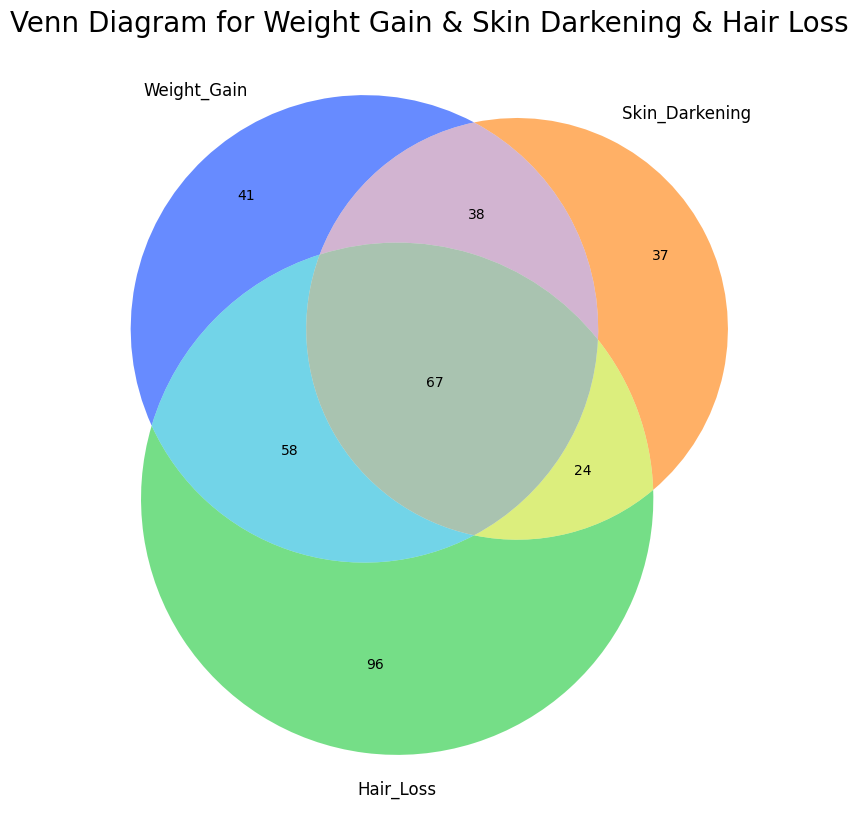

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
v = venn3(subsets=sizes, set_labels=("Weight_Gain", "Skin_Darkening ", "Hair_Loss"), ax=ax, alpha=0.6, set_colors= sns.color_palette("bright"))

for text in v.set_labels:
    text.set_fontsize(12)

ax.set_title("Venn Diagram for Weight Gain & Skin Darkening & Hair Loss", size=20)
plt.show()

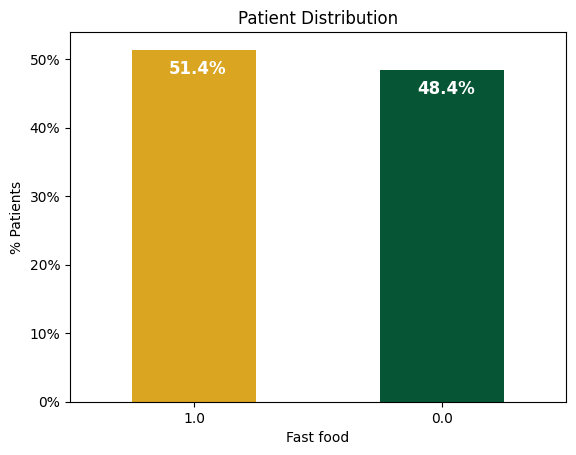

In [104]:
colors = ['#daa520','#065535']
ax = (df['Fast food (Y/N)'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Fast food')
ax.set_ylabel('% Patients')
ax.set_title('Patient Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

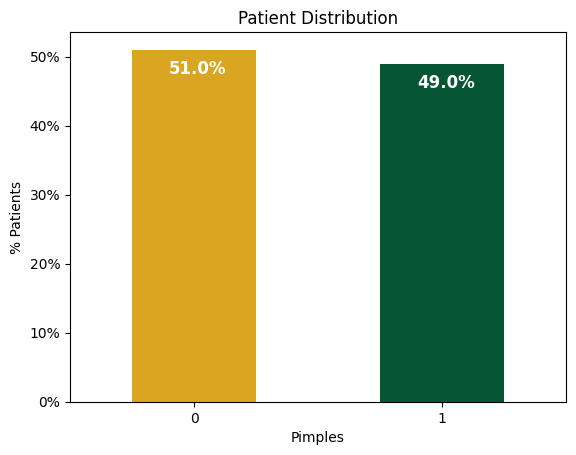

In [105]:
colors = ['#daa520','#065535']
ax = (df['Pimples(Y/N)'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Pimples')
ax.set_ylabel('% Patients')
ax.set_title('Patient Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

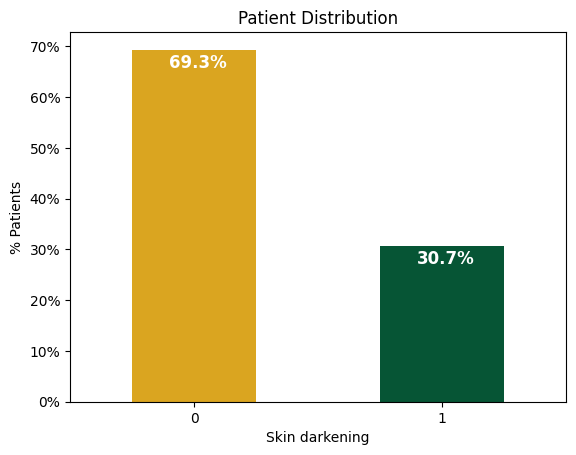

In [106]:
colors = ['#daa520','#065535']
ax = (df['Skin darkening (Y/N)'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Skin darkening')
ax.set_ylabel('% Patients')
ax.set_title('Patient Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

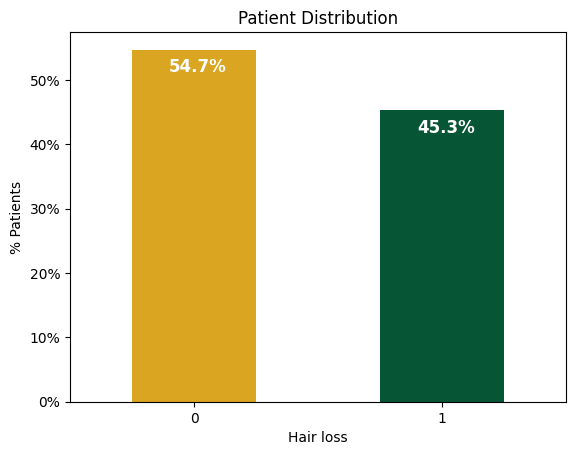

In [107]:
colors = ['#daa520','#065535']
ax = (df['Hair loss(Y/N)'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Hair loss')
ax.set_ylabel('% Patients')
ax.set_title('Patient Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

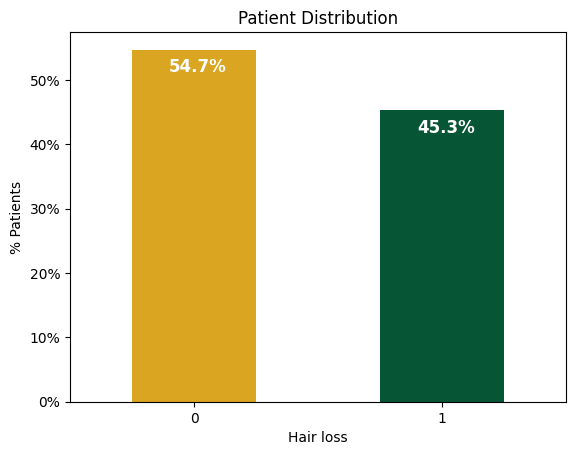

In [108]:
colors = ['#daa520','#065535']
ax = (df['Hair loss(Y/N)'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Hair loss')
ax.set_ylabel('% Patients')
ax.set_title('Patient Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

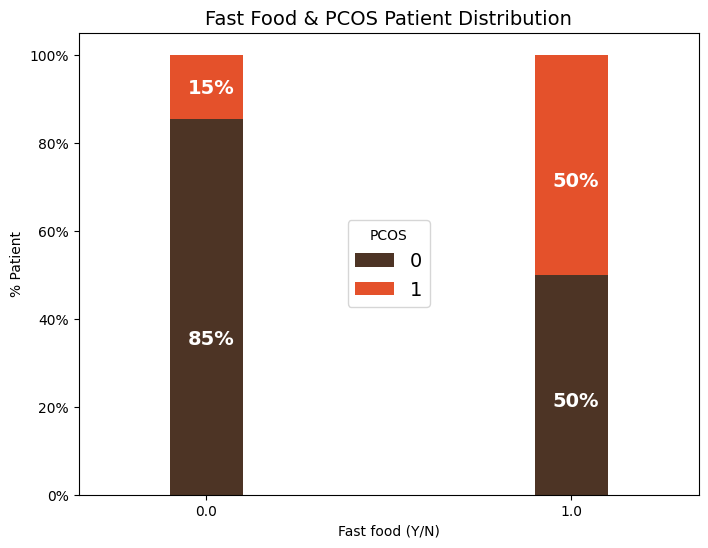

In [109]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Fast food (Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('Fast Food & PCOS Patient Distribution',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

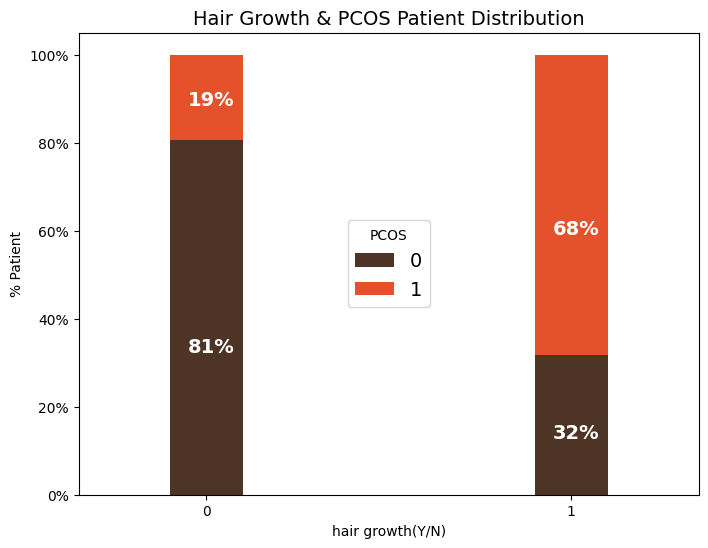

In [110]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['hair growth(Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('Hair Growth & PCOS Patient Distribution',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

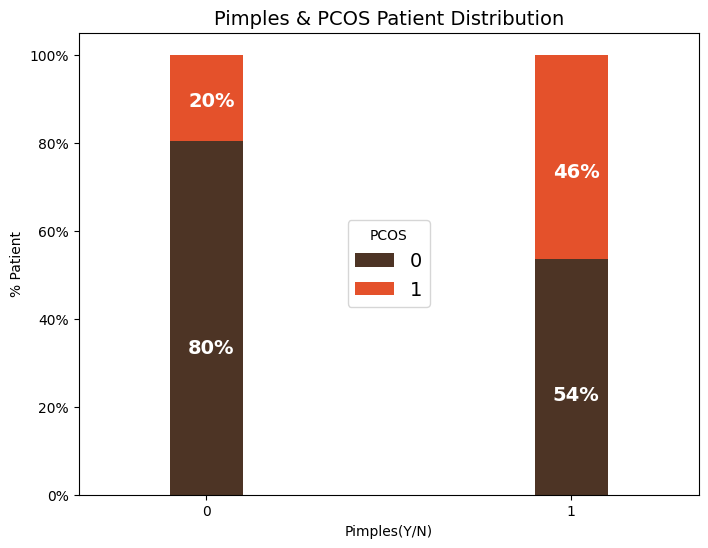

In [111]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Pimples(Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('Pimples & PCOS Patient Distribution',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

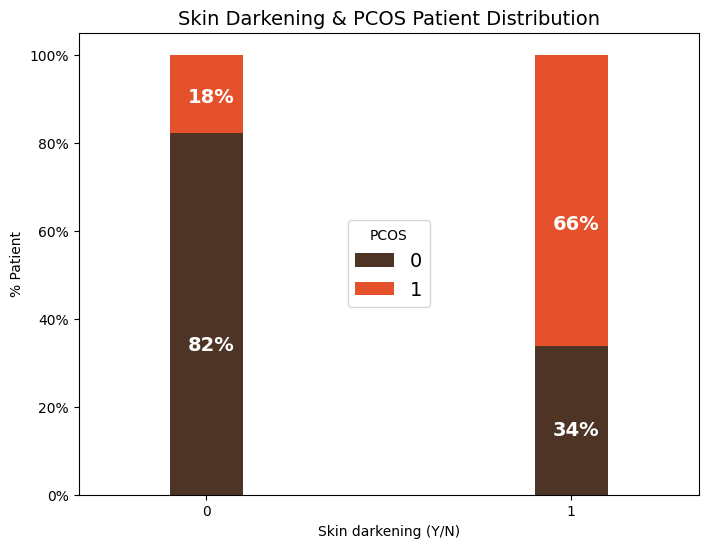

In [112]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Skin darkening (Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('Skin Darkening & PCOS Patient Distribution',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

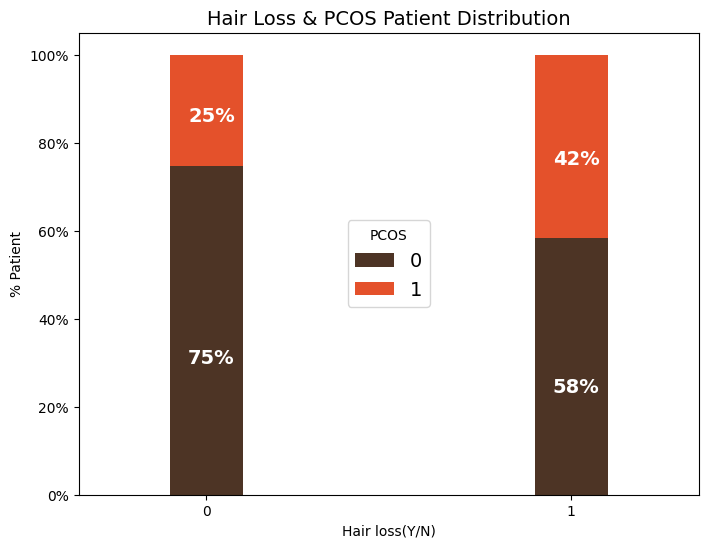

In [113]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Hair loss(Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('Hair Loss & PCOS Patient Distribution',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

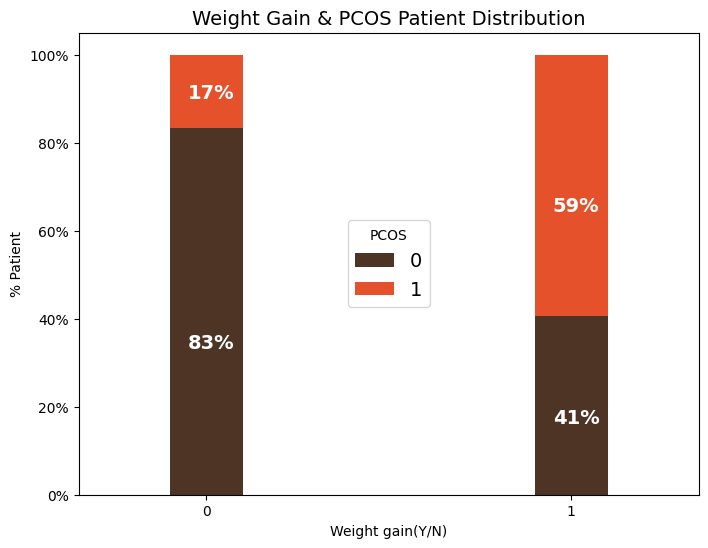

In [114]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Weight gain(Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('Weight Gain & PCOS Patient Distribution',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

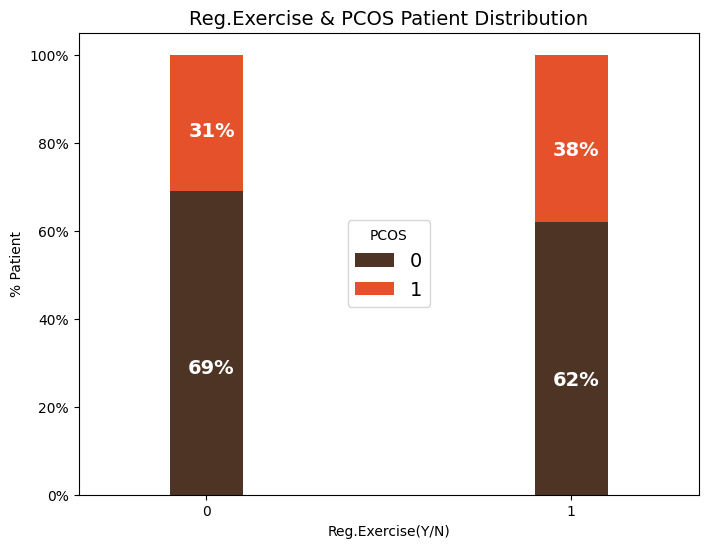

In [115]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Reg.Exercise(Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('Reg.Exercise & PCOS Patient Distribution',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

<Figure size 0x1000 with 0 Axes>

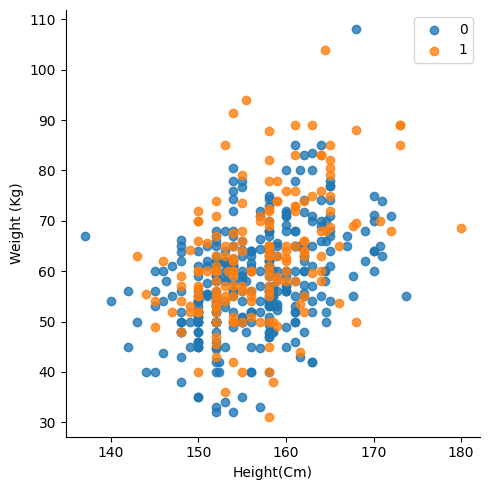

In [116]:
plt.figure(figsize=(0,10))
sns.lmplot(x="Height(Cm)", y="Weight (Kg)", data=df, fit_reg=False, hue='PCOS (Y/N)', legend=False)
plt.legend(loc='upper right')
plt.show()

<Figure size 0x1000 with 0 Axes>

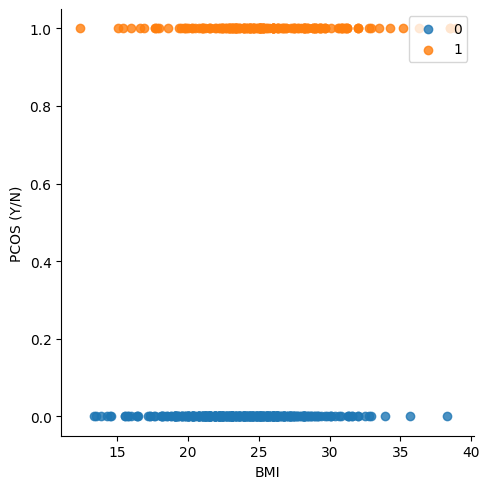

In [117]:
plt.figure(figsize=(0,10))
sns.lmplot(x="BMI", y="PCOS (Y/N)", data=df, fit_reg=False, hue="PCOS (Y/N)", legend=False)
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Distribution of FSH/LH by PCOS')

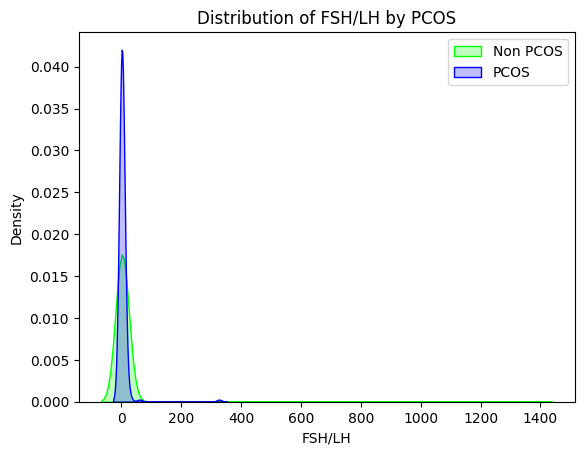

In [118]:
ax = sns.kdeplot(df["FSH/LH"][(df['PCOS (Y/N)'] == 0)], color="Lime", shade = True)
ax = sns.kdeplot(df["FSH/LH"][(df['PCOS (Y/N)'] == 1)], ax =ax, color="Blue", shade= True)
ax.legend(["Non PCOS","PCOS"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('FSH/LH')
ax.set_title('Distribution of FSH/LH by PCOS')

In [119]:
selected_columns = ["BMI", "Cycle length(days)", 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)',
       'Waist(inch)', 'WaistHip_Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)','BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)']

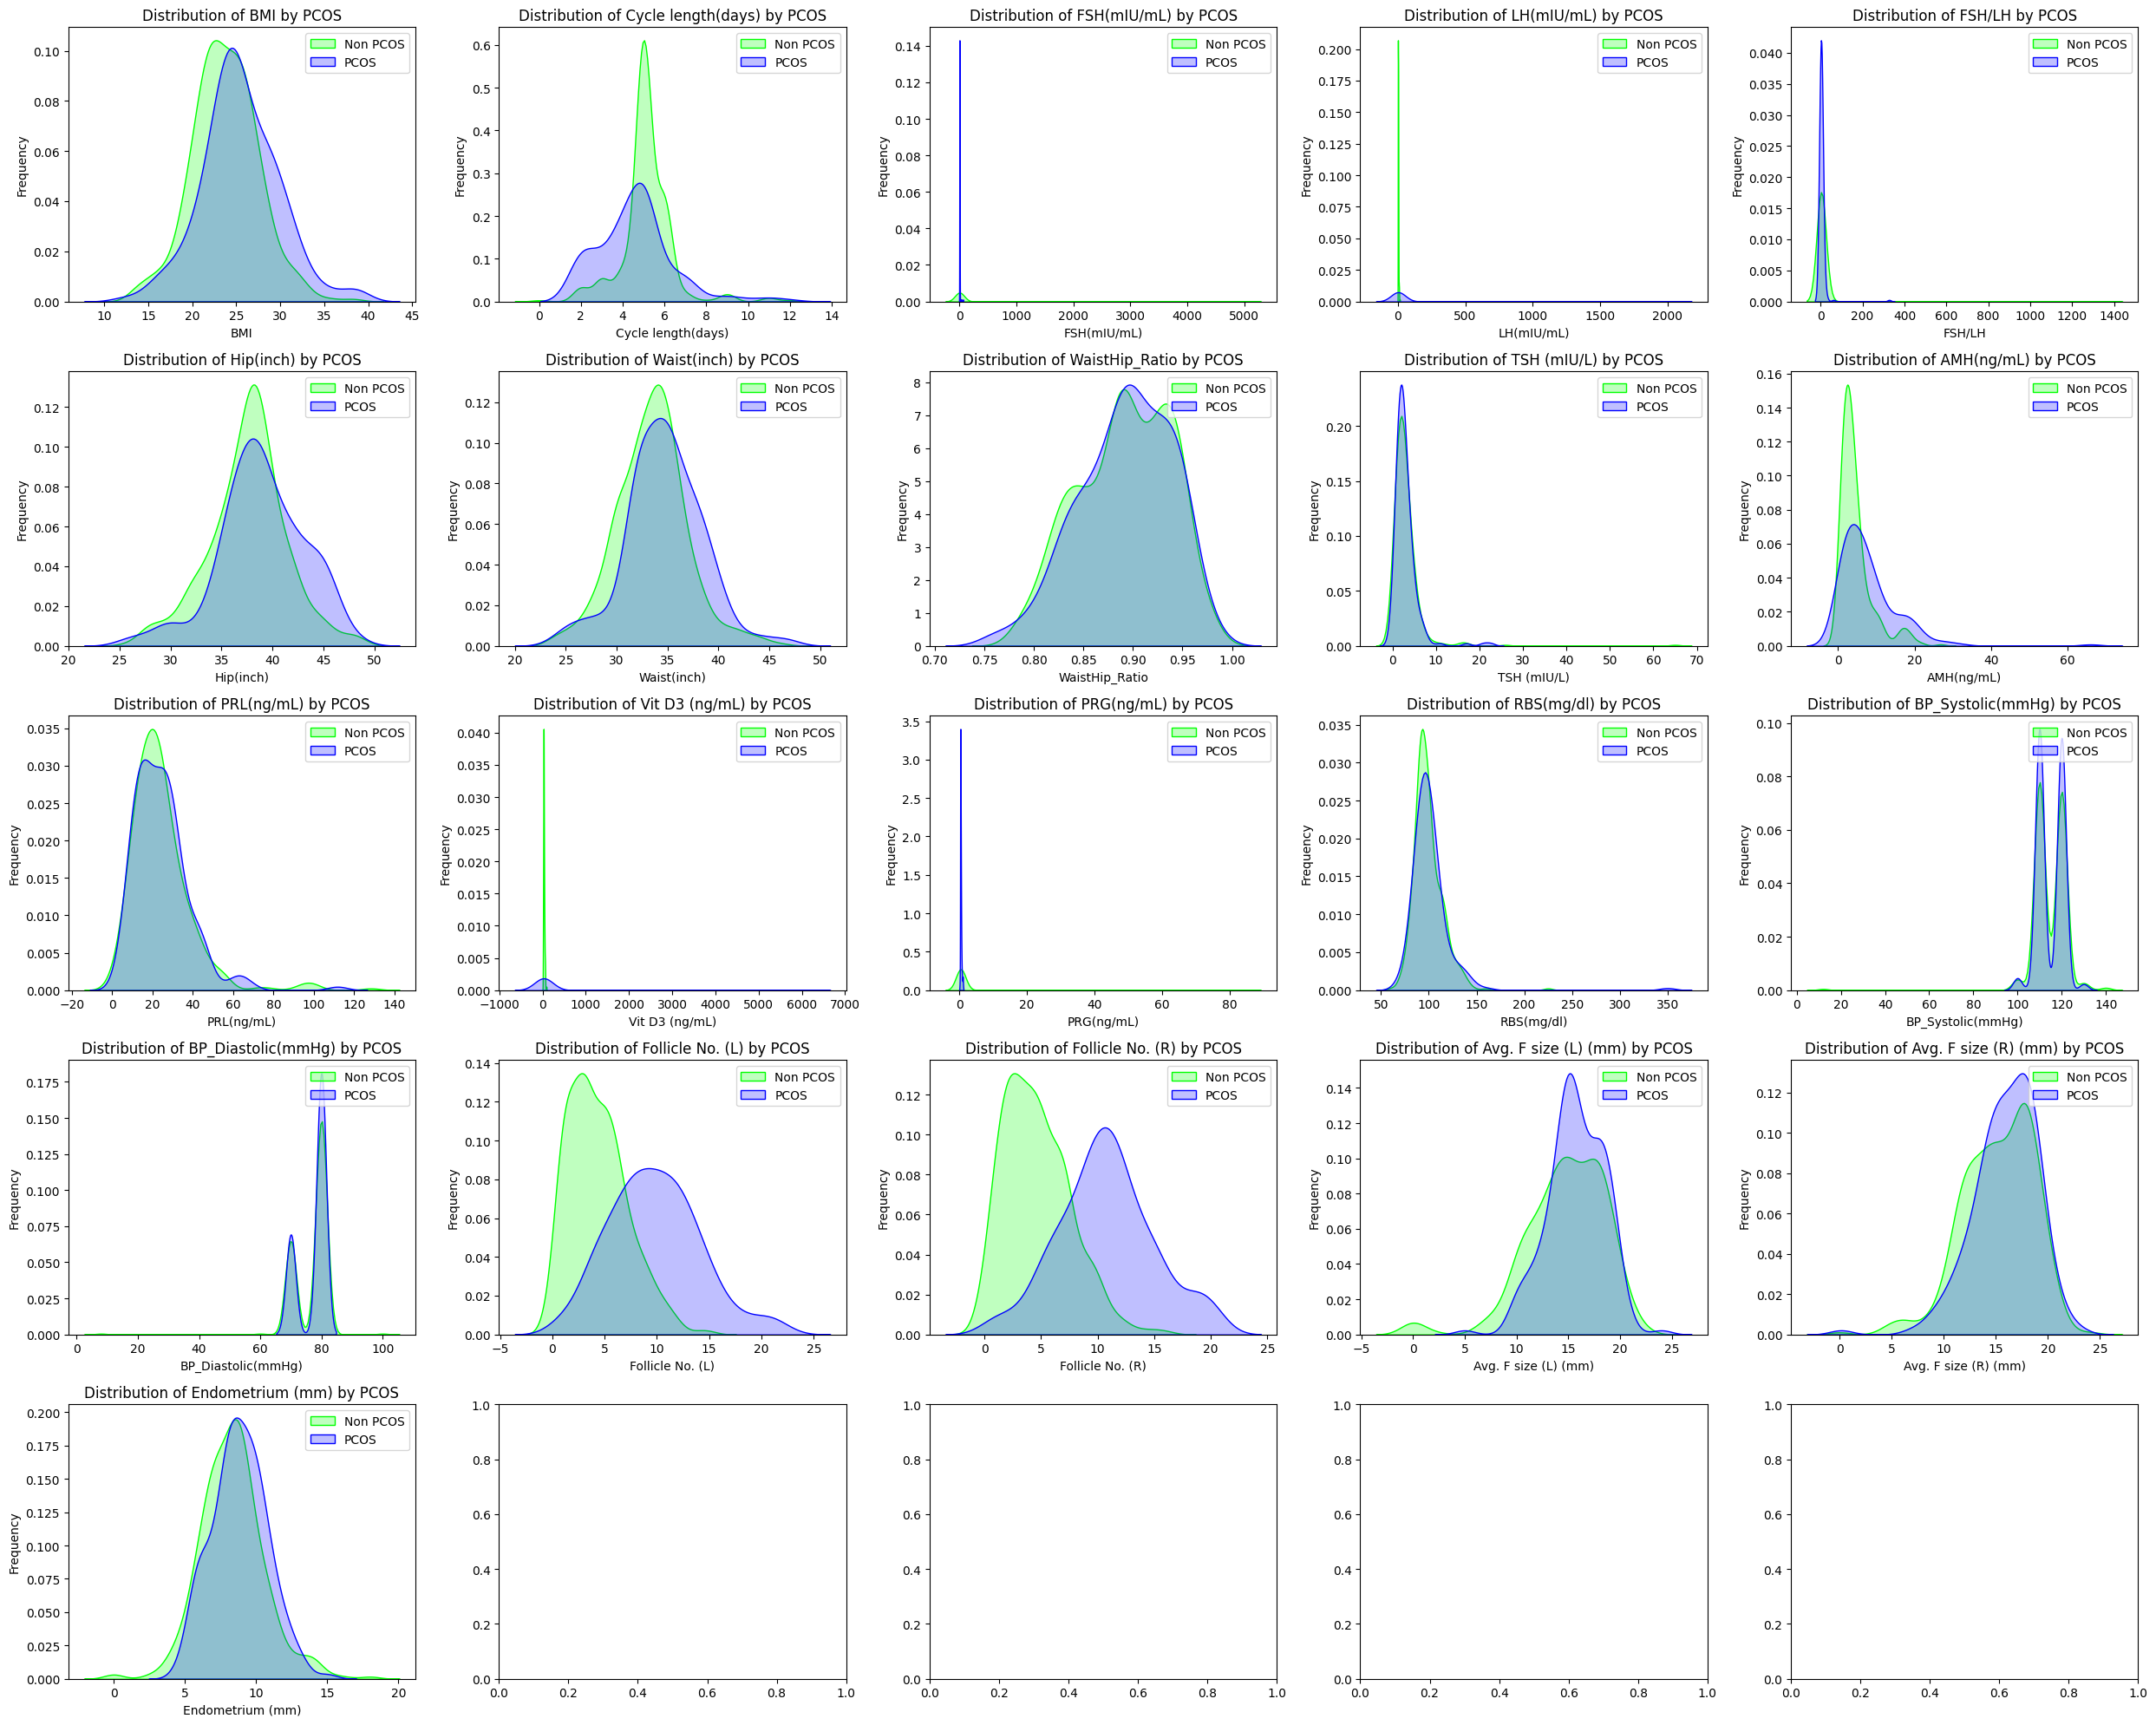

In [120]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))

for i in range(len(selected_columns)):
    row = i // 5
    col = i % 5

    sns.kdeplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 0)], color="Lime", shade=True, ax=axes[row, col])
    sns.kdeplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 1)], color="Blue", shade=True, ax=axes[row, col])

    axes[row, col].legend(["Non PCOS", "PCOS"], loc='upper right')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(selected_columns[i])
    axes[row, col].set_title(f'Distribution of {selected_columns[i]} by PCOS')


plt.tight_layout()
plt.show()

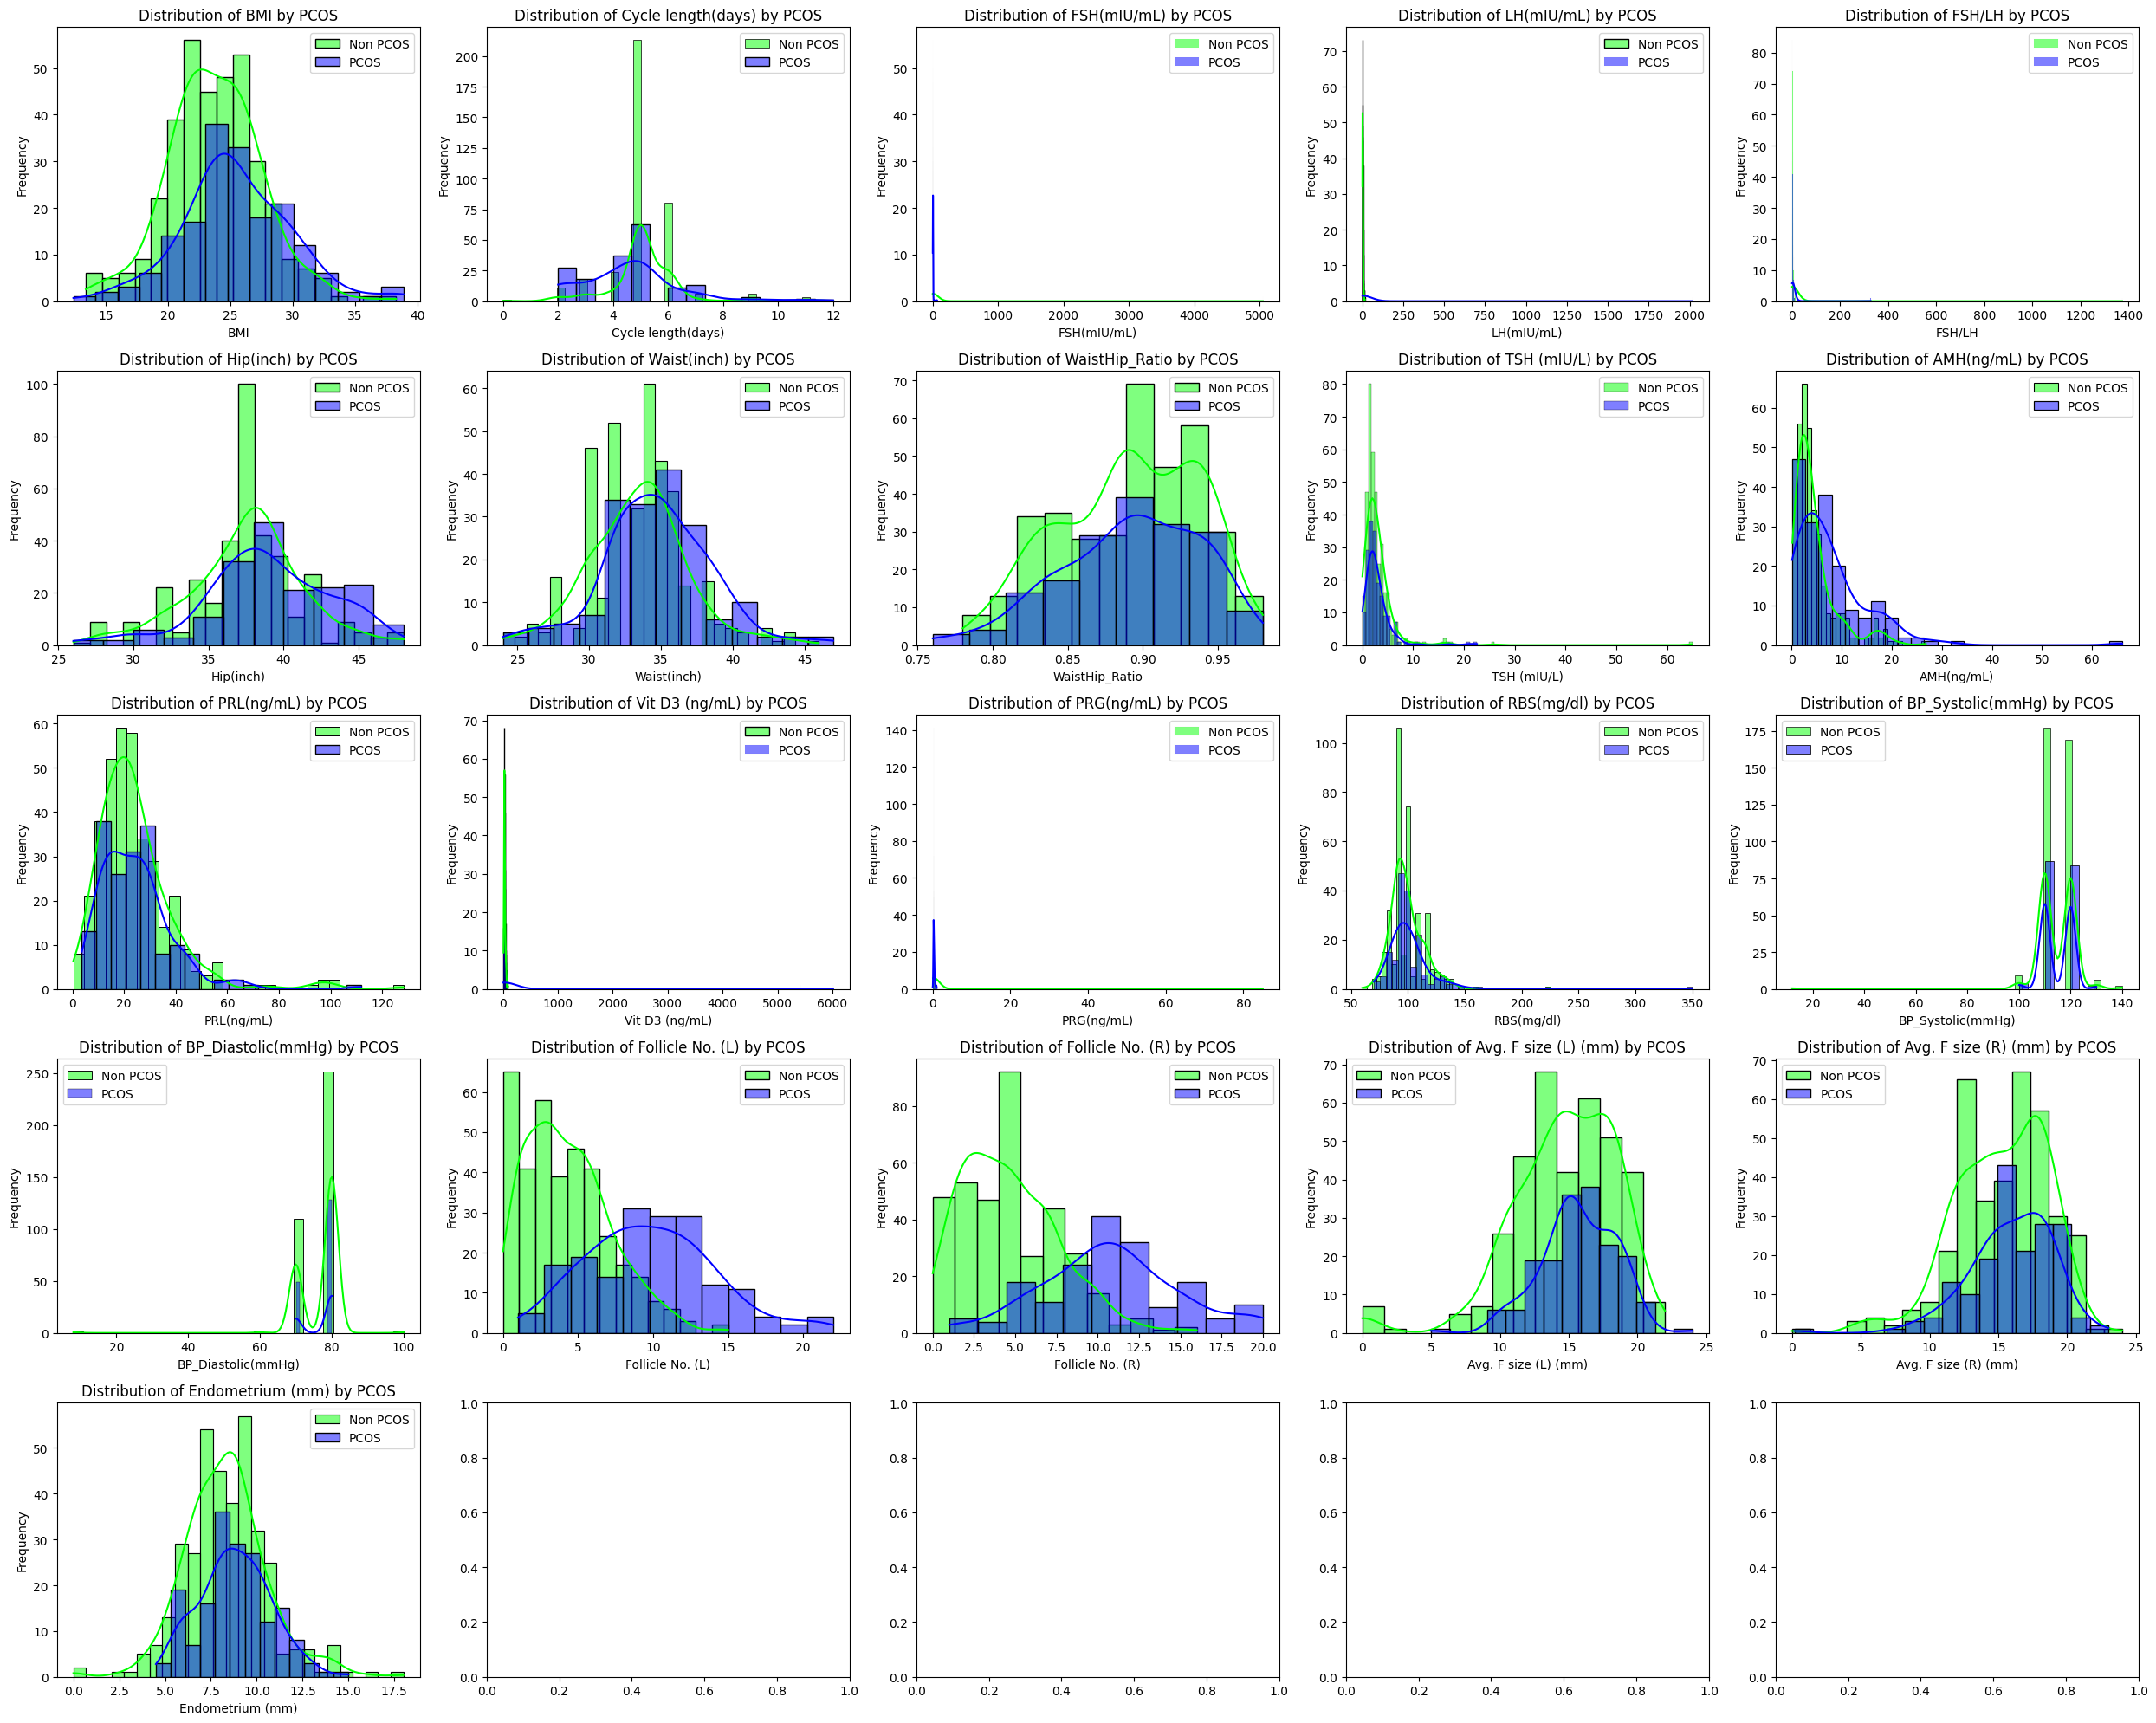

In [121]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))

for i in range(len(selected_columns)):
    row = i // 5
    col = i % 5

    sns.histplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 0)], color="Lime", kde=True, ax=axes[row, col], label="Non PCOS")
    sns.histplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 1)], color="Blue", kde=True, ax=axes[row, col], label="PCOS")

    axes[row, col].legend()
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(selected_columns[i])
    axes[row, col].set_title(f'Distribution of {selected_columns[i]} by PCOS')


plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

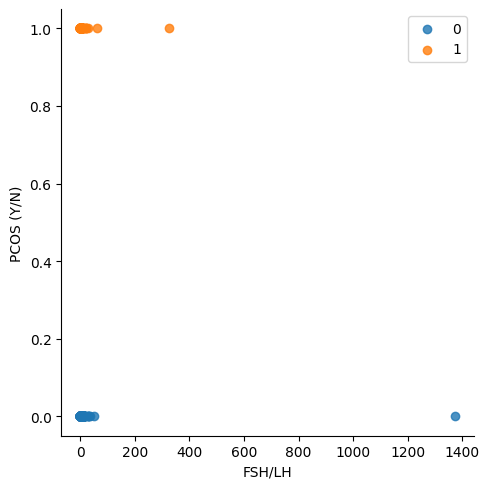

In [122]:
plt.figure(figsize=(5,5))
sns.lmplot(x="FSH/LH", y="PCOS (Y/N)", data=df, fit_reg=False, hue='PCOS (Y/N)', legend=False)
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Distribution of FSH by PCOS')

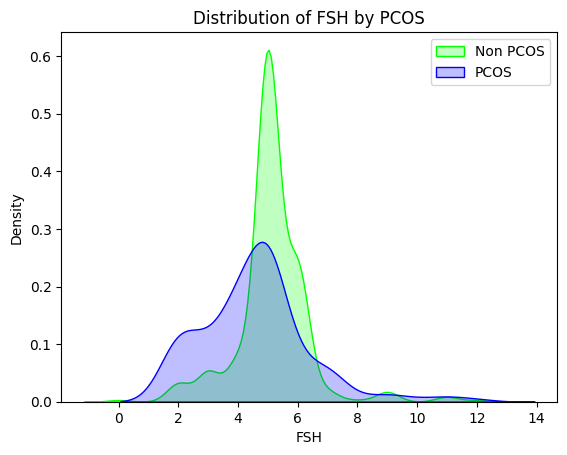

In [123]:
ax = sns.kdeplot(df["Cycle length(days)"][(df['PCOS (Y/N)'] == 0)], color="Lime", shade = True)
ax = sns.kdeplot(df["Cycle length(days)"][(df['PCOS (Y/N)'] == 1)], ax =ax, color="Blue", shade= True)
ax.legend(["Non PCOS","PCOS"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('FSH')
ax.set_title('Distribution of FSH by PCOS')

In [124]:
df[df["FSH/LH"] == 1372.830] # FSH: 5052.0 LH: 3.68

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
329           0         29         53.0       161.0  20.4           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
329               72                18      10.2           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
329                   6                    5.0              1   

     No_of_abortions  I_beta_HCG(mIU/mL)  II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
329                0               900.6                900.6       5052.0   

     LH(mIU/mL)   FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
329        3.68  1372.83         38           35            0.92         0.83   

     AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
329         3.5       30.58            28.6         0.3       108.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
329                 0                 0                     0               1   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
329             1              1.0                  0                110   

     BP_Diastolic(mmHg)  Follicle No. (L)  Follicle No. (R)  \
329                  80                 6                 4   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
329                  16.0                  17.0               6.0

In [125]:
df.shape

(541, 42)

In [126]:
df[df.index == 329]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
329           0         29         53.0       161.0  20.4           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
329               72                18      10.2           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
329                   6                    5.0              1   

     No_of_abortions  I_beta_HCG(mIU/mL)  II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
329                0               900.6                900.6       5052.0   

     LH(mIU/mL)   FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
329        3.68  1372.83         38           35            0.92         0.83   

     AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
329         3.5       30.58            28.6         0.3       108.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
329                 0                 0                     0               1   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
329             1              1.0                  0                110   

     BP_Diastolic(mmHg)  Follicle No. (L)  Follicle No. (R)  \
329                  80                 6                 4   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
329                  16.0                  17.0               6.0

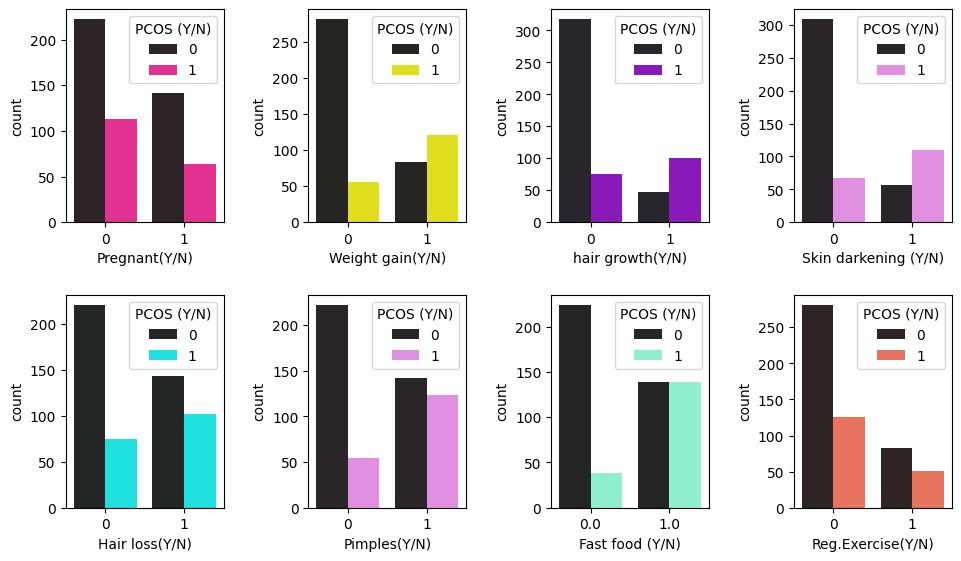

In [127]:
plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
sns.countplot(df, x="Pregnant(Y/N)", hue="PCOS (Y/N)", color='deeppink')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,2)
sns.countplot(df, x="Weight gain(Y/N)", hue="PCOS (Y/N)", color='yellow')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,3)
sns.countplot(df, x="hair growth(Y/N)", hue="PCOS (Y/N)", color='darkviolet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,4)
sns.countplot(df, x="Skin darkening (Y/N)", hue="PCOS (Y/N)", color='violet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,5)
sns.countplot(df, x="Hair loss(Y/N)", hue="PCOS (Y/N)",  color='cyan')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,6)
sns.countplot(df, x="Pimples(Y/N)", hue="PCOS (Y/N)",  color='violet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,7)
sns.countplot(df, x="Fast food (Y/N)", hue="PCOS (Y/N)",  color='aquamarine')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,8)
sns.countplot(df, x="Reg.Exercise(Y/N)", hue="PCOS (Y/N)", color='tomato')
plt.tight_layout(pad=2.1)

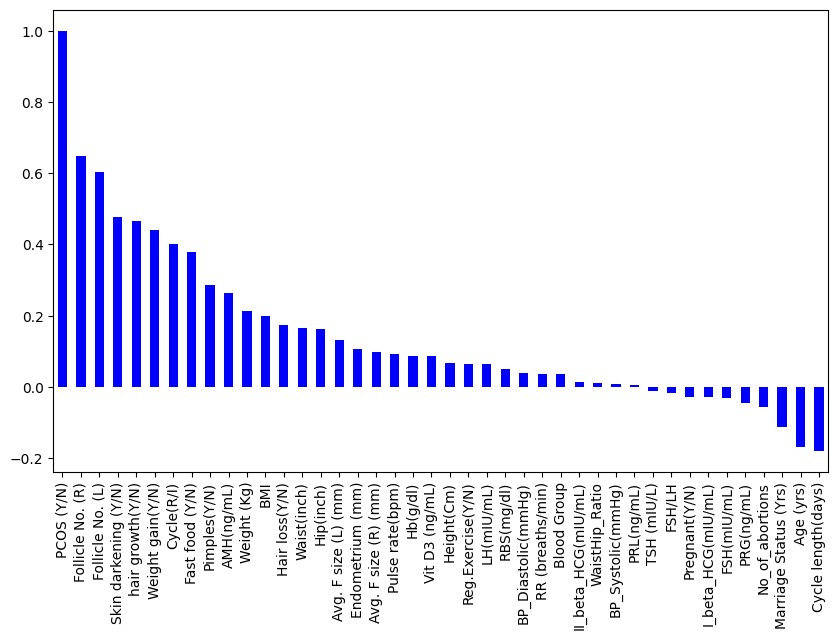

In [128]:
plt.figure(figsize=(10,6))
df.corr()['PCOS (Y/N)'].sort_values(ascending = False).plot(kind='bar', color= 'blue')
plt.xticks(rotation=90);

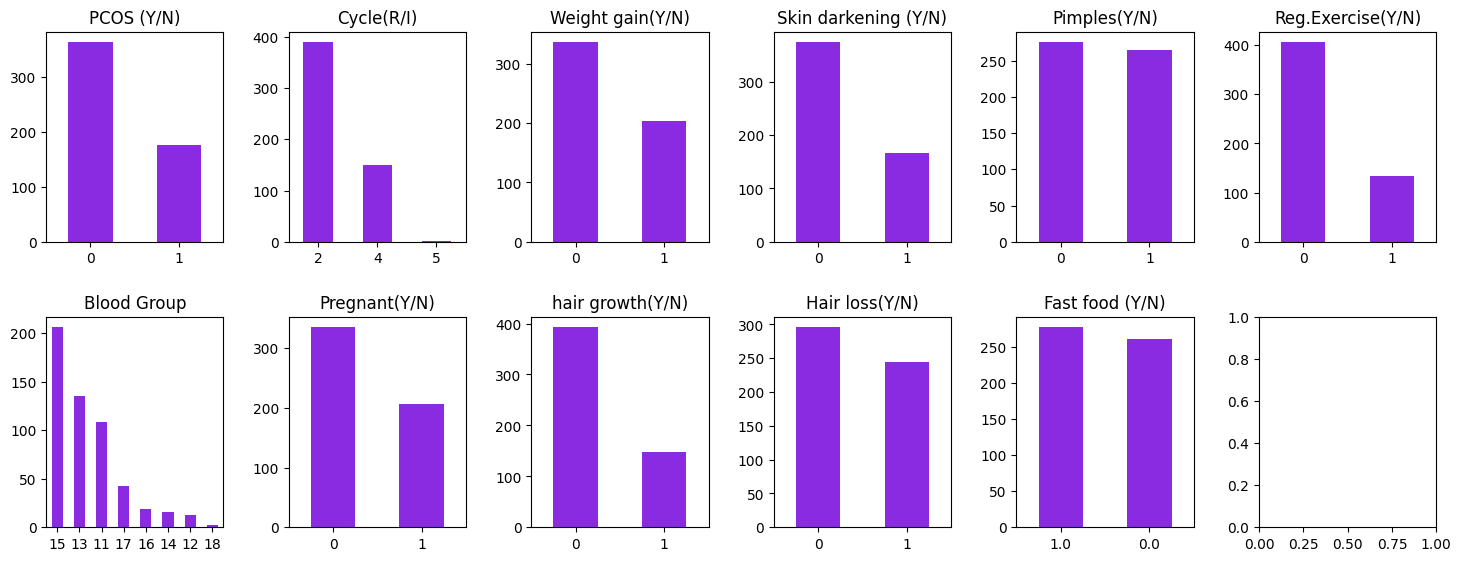

In [129]:
services = ['PCOS (Y/N)', 'Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
            'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

fig, axes = plt.subplots(nrows = 2, ncols = 6, figsize = (15,6))
for i, item in enumerate(services):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='blueviolet')
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-2,1],rot = 0, color='blueviolet')
    elif i >=4 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color='blueviolet')
    elif i >=6 and i < 8:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-8,3],rot = 0, color='blueviolet')
    elif i >=8 and i < 10:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-10,4],rot = 0, color='blueviolet')
    elif i < 12:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-12,5],rot = 0, color='blueviolet')
    ax.set_title(item)
    plt.tight_layout(pad=2.1)

Text(0.5, 1.0, 'Correlation Heatmap')

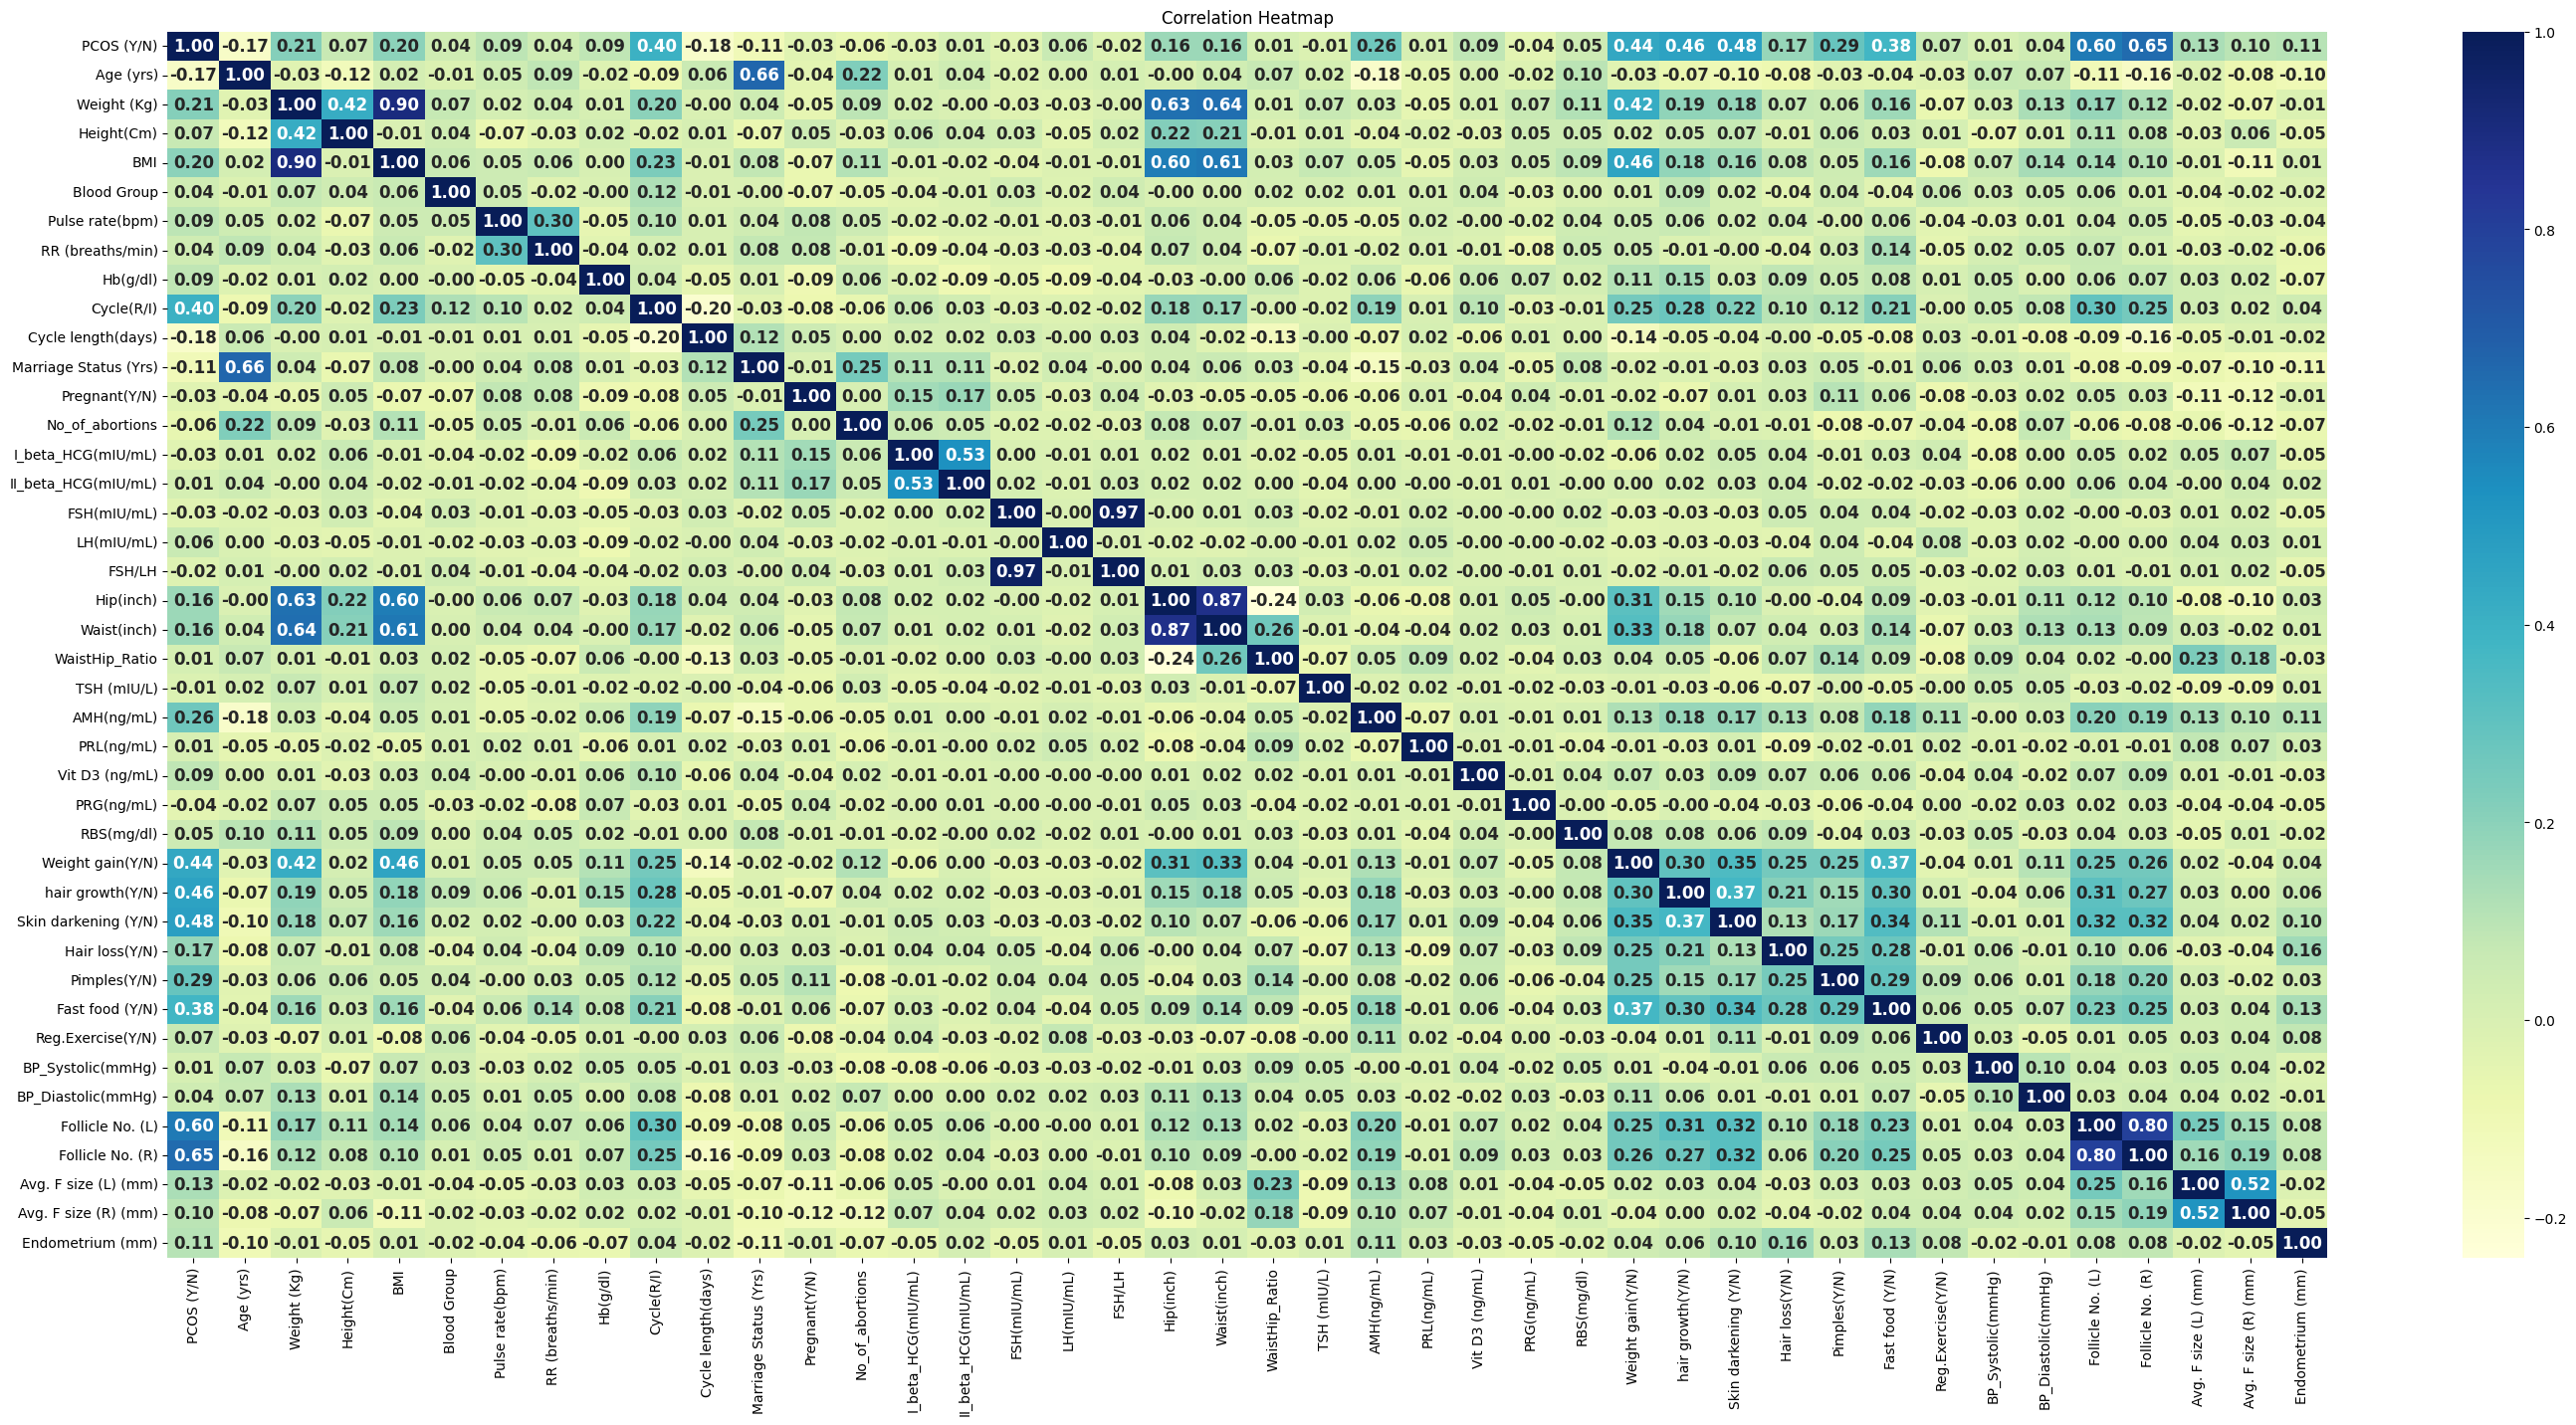

In [130]:
corr = df.corr()
plt.figure(figsize = (35,16))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', fmt='.2f', annot_kws={'size': 12, 'fontweight': 'semibold'})
plt.title('Correlation Heatmap')

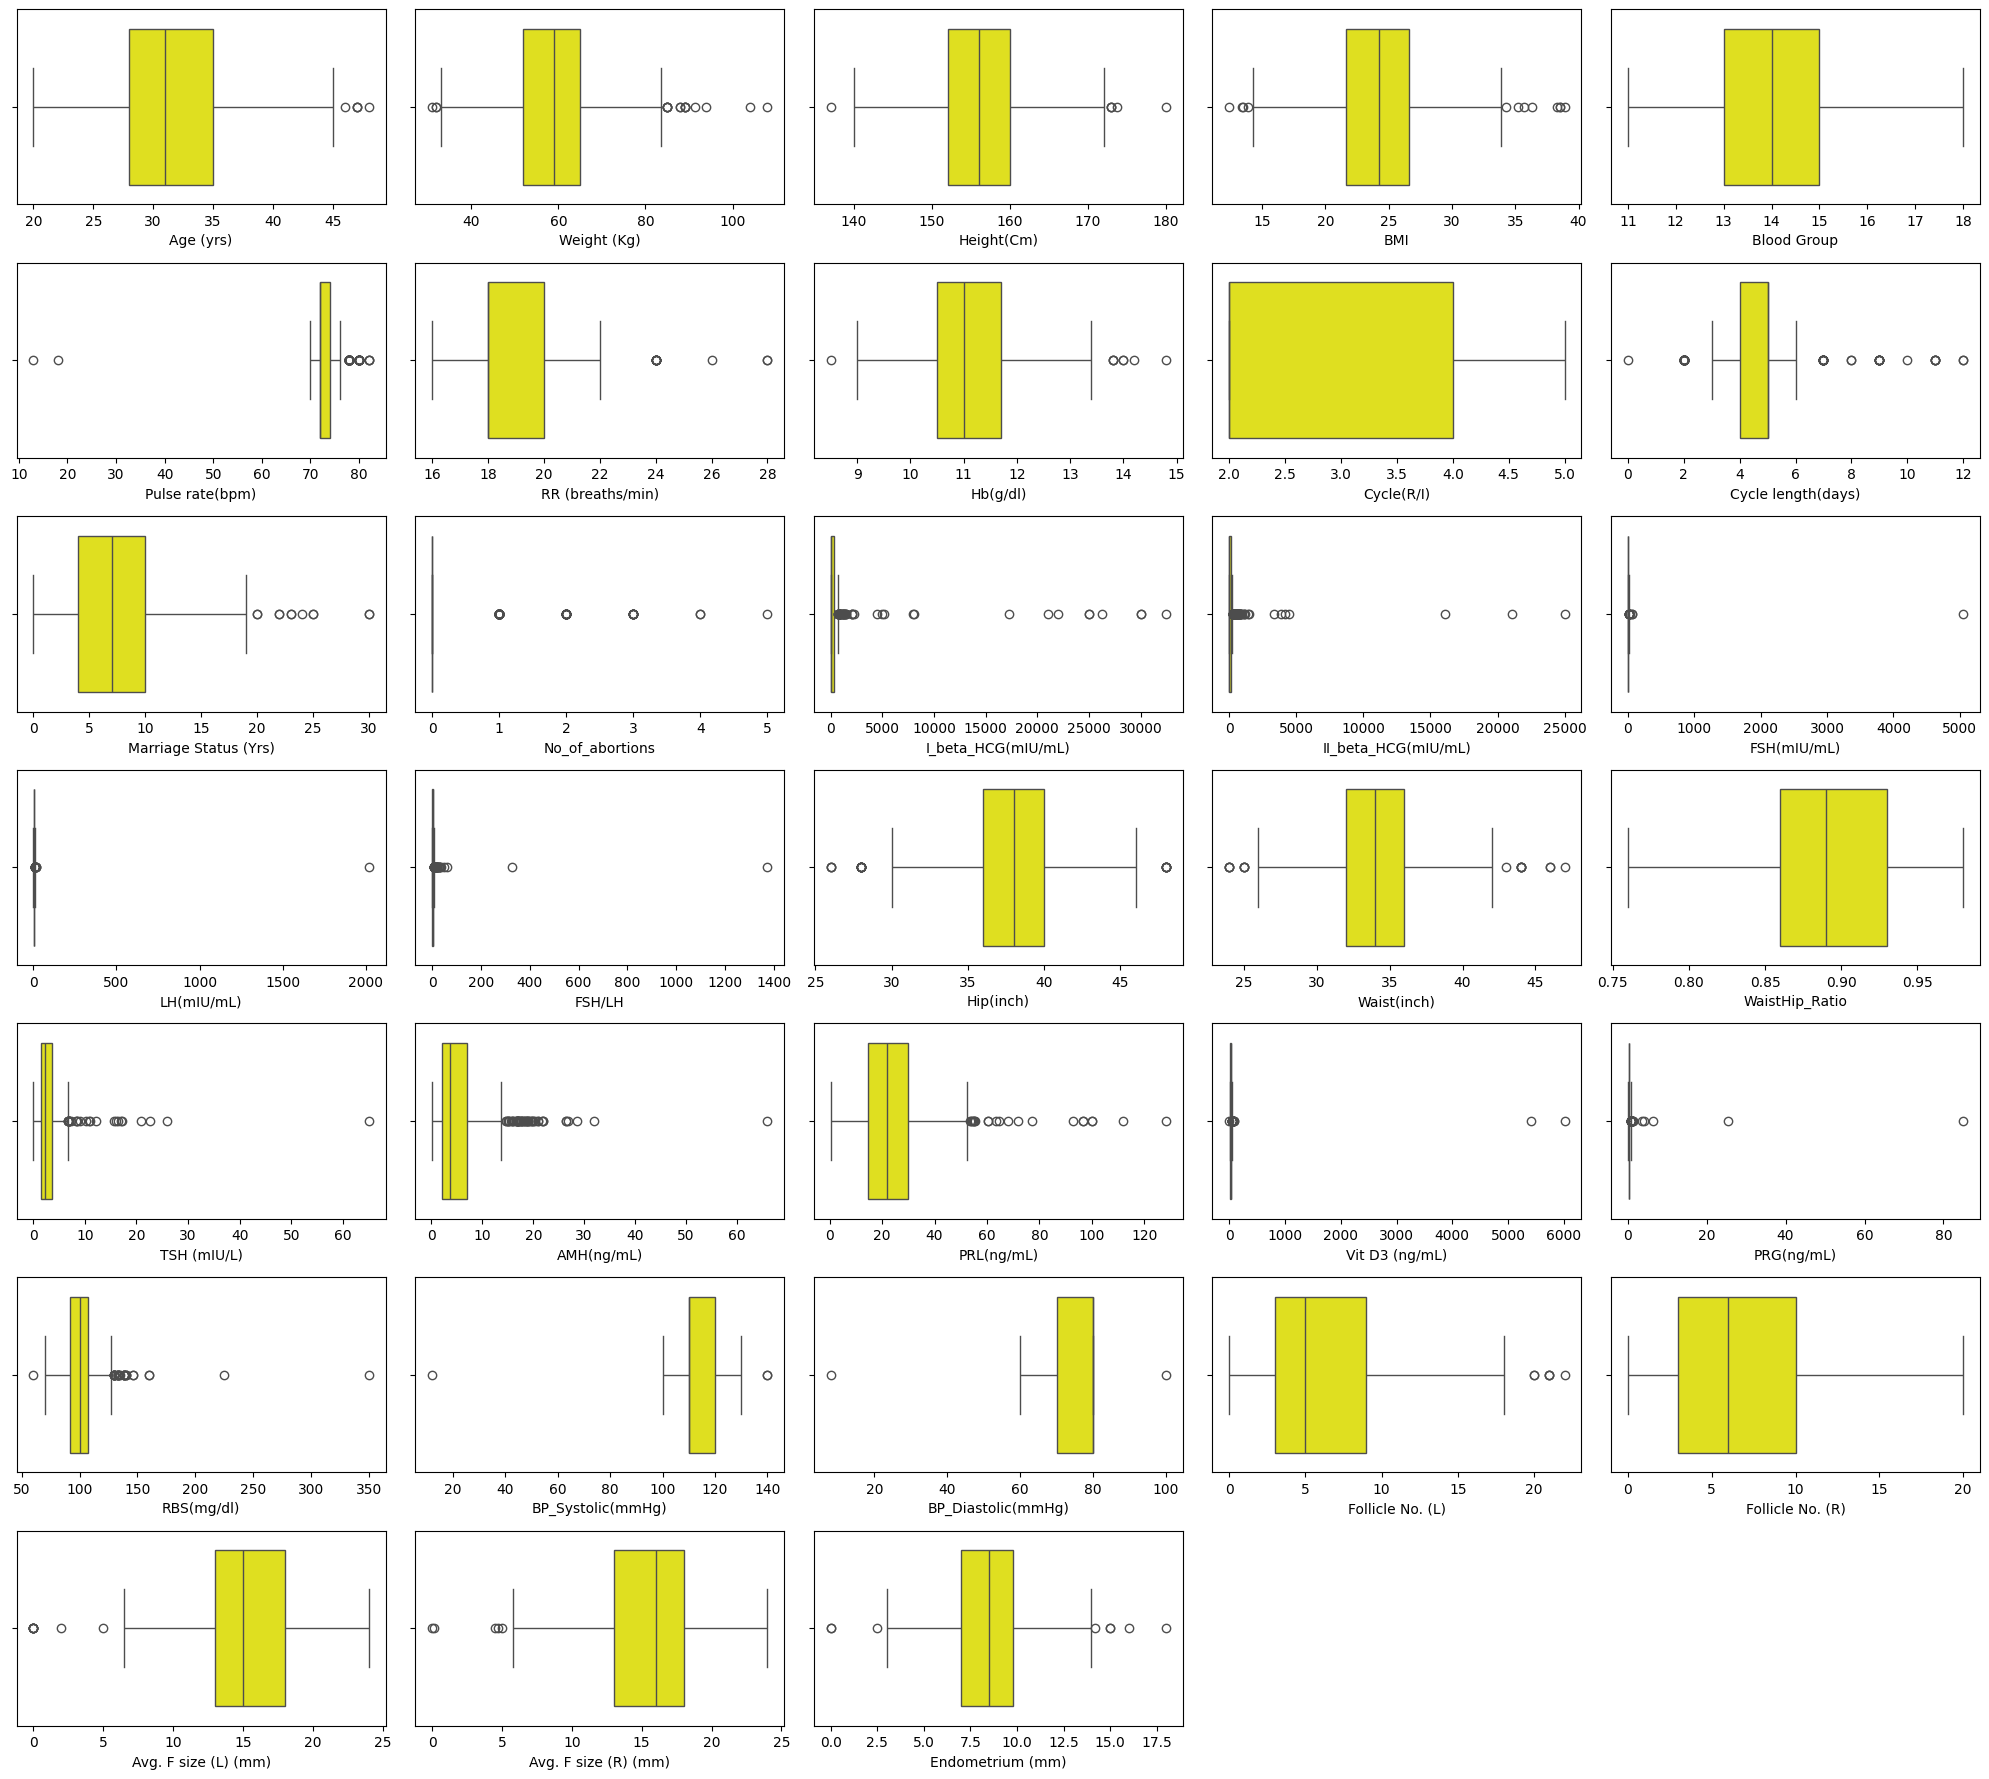

In [131]:
plt.figure(figsize=(20,20))
num = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marriage Status (Yrs)', 'No_of_abortions', 'I_beta_HCG(mIU/mL)', 'II_beta_HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'WaistHip_Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
num_df = df[num]
for num,col in enumerate(num_df.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(num_df[col], orient="h", color='yellow')
    plt.tight_layout()

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Load the dataset
dataset = pd.read_csv("/content/PCOS_data.csv")

dataset.head(10)

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   
5       6                 6           0          36         74.1        165.0   
6       7                 7           0          34         64.0        156.0   
7       8                 8           0          33         58.5        159.0   
8       9                 9           0          32         40.0        158.0   
9      10                10           0          36         52.0        150.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  \
0  19.3           15                78                22     10.48   
1  24.9           15                74                20     11.70   
2  25.3           11                72                18     11.80   
3  29.7           13                72                20     12.00   
4  20.1           11                72                18     10.00   
5  27.2           15                78                28     11.20   
6  26.3           11                72                18     10.90   
7  23.1           13                72                20     11.00   
8  16.0           11                72                18     11.80   
9  23.1           15                80                20     10.00   

   Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
0           2                   5                    7.0              0   
1           2                   5                   11.0              1   
2           2                   5                   10.0              1   
3           2                   5                    4.0              0   
4           2                   5                    1.0              1   
5           2                   5                    8.0              1   
6           2                   5                    2.0              0   
7           2                   5                   13.0              1   
8           2                   5                    8.0              0   
9           4                   2                    4.0              0   

   No. of abortions    I   beta-HCG(mIU/mL)  II    beta-HCG(mIU/mL)  \
0                 0                    1.99                    1.99   
1                 0                   60.80                    1.99   
2                 0                  494.08                  494.08   
3                 0                    1.99                    1.99   
4                 0                  801.45                  801.45   
5                 0                  237.97                    1.99   
6                 0                    1.99                    1.99   
7                 2                  100.51                  100.51   
8                 1                    1.99                    1.99   
9                 0                    1.99                    1.99   

   FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
0         7.95        3.68    2.16         36           30             0.83   
1         6.73        1.09    6.17         38           32             0.84   
2         5.54        0.88    6.30         40           36             0.90   
3         8.06        2.36    3.42         42           36             0.86   
4         3.98        0.90    4.42         37           30             0.81   
5         3.24        1.07    3.03         44           38             0.86   
6         2.85        0.31    9.19         39           33             0.85   
7         4.86        3.07    1.58         44           38             0.86   
8         3.76       

In [134]:

# Preprocessing
dataset.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis=1, inplace=True)
imputer = SimpleImputer(strategy='mean')
dataset.fillna(dataset.mean(), inplace=True)
label_encoder = LabelEncoder()
dataset['PCOS (Y/N)'] = label_encoder.fit_transform(dataset['PCOS (Y/N)'])
X = dataset.drop('PCOS (Y/N)', axis=1)
y = dataset['PCOS (Y/N)']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [137]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Print data types of all columns
print(dataset.dtypes)


PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [140]:
print(dataset['II    beta-HCG(mIU/mL)'].unique())
print(dataset['AMH(ng/mL)'].unique())


[1.990000e+00 4.940800e+02 8.014500e+02 1.005100e+02 1.585100e+02
 1.214230e+03 9.155000e+01 7.499800e+02 2.186500e+02 1.300000e+01
 6.106300e+02 4.490180e+03 1.124000e+01 1.500000e+01 7.680300e+02
 1.200000e+01 1.000000e+01 2.000000e+01 3.066000e+01 1.455000e+03
 4.974100e+02 1.670000e+02 9.830000e+00 1.410600e+02 5.285000e+02
 1.775700e+02 6.503000e+01 1.736600e+02 1.614900e+02 3.980000e+00
 7.566100e+02 2.550200e+02 2.737000e+02 1.446000e+01 1.458900e+02
 1.000900e+02 1.101700e+02 1.743700e+02 7.551000e+01 3.893060e+03
 6.002300e+02 3.350190e+03 9.763000e+01 1.440000e+01 2.000000e+00
 1.775800e+02 1.217000e+01 2.530000e+01 1.002000e+02 4.796600e+02
 1.900000e+00 5.860600e+02 2.800000e+00 1.536000e+01 5.408000e+01
 1.521300e+02 3.050000e+00 2.013600e+02 1.606969e+04 5.708000e+01
 2.327100e+02 2.350000e+01 1.803000e+02 1.023000e+02 4.813000e+02
 5.638000e+02 4.320000e+00 2.305000e+02 1.553000e+02 3.888000e+00
 5.236000e+02 1.650000e+00 3.830000e+00 5.691000e+02 2.365000e+02
 8.966000e

In [141]:
# Replace non-numeric values in 'AMH(ng/mL)' column with NaN
dataset['AMH(ng/mL)'] = pd.to_numeric(dataset['AMH(ng/mL)'], errors='coerce')

# Fill NaN values with the mean of the column
dataset['AMH(ng/mL)'].fillna(dataset['AMH(ng/mL)'].mean(), inplace=True)


In [142]:
print(dataset['AMH(ng/mL)'].unique())


[ 2.07   1.53   6.63   1.22   2.26   6.74   3.05   1.54   1.     1.61
  4.47   1.67   7.94   2.38   0.88   0.69   3.78   1.92   2.85   2.13
  4.13   2.5    1.89   0.26   3.84   3.56   1.56   1.69   2.34   1.58
  2.36   3.64   2.78   0.33   2.35   3.88   3.55   4.33   3.66   4.5
  3.2    2.1    6.55   1.2    2.33   3.22   2.333  2.31   4.2    3.21
  2.14   2.3    4.6    5.8    5.2    4.63   1.01   2.58   0.35   5.23
  3.68   2.55   4.91   1.03   6.56   3.91   5.42   1.65   2.06   1.81
  3.81   3.65   8.98   1.7    3.18   2.75   0.86   2.29   2.19   8.46
  4.59   1.04   4.27   3.86   1.42  10.07   0.98   4.07   3.9   10.
 16.9   17.    21.9    1.6    3.3   21.    12.7    1.8    3.6   15.
  5.    17.9   19.8    9.2    2.4    5.14   0.3   11.48  19.3    8.8
 19.     4.3    1.4   12.6    4.8   17.1   11.6   18.4    9.9    3.7
  2.9    2.     4.    15.9    7.51  10.04   6.86   7.02   8.75   5.27
  9.     3.41   0.45   2.53   0.29   2.6    2.83   2.01   5.67   1.68
  3.63   3.49   8.    10.25

In [143]:
import numpy as np

# Replace non-numeric values in 'AMH(ng/mL)' column with NaN
dataset['AMH(ng/mL)'] = pd.to_numeric(dataset['AMH(ng/mL)'], errors='coerce')

# Fill NaN values with the mean of the column
dataset['AMH(ng/mL)'].fillna(dataset['AMH(ng/mL)'].mean(), inplace=True)


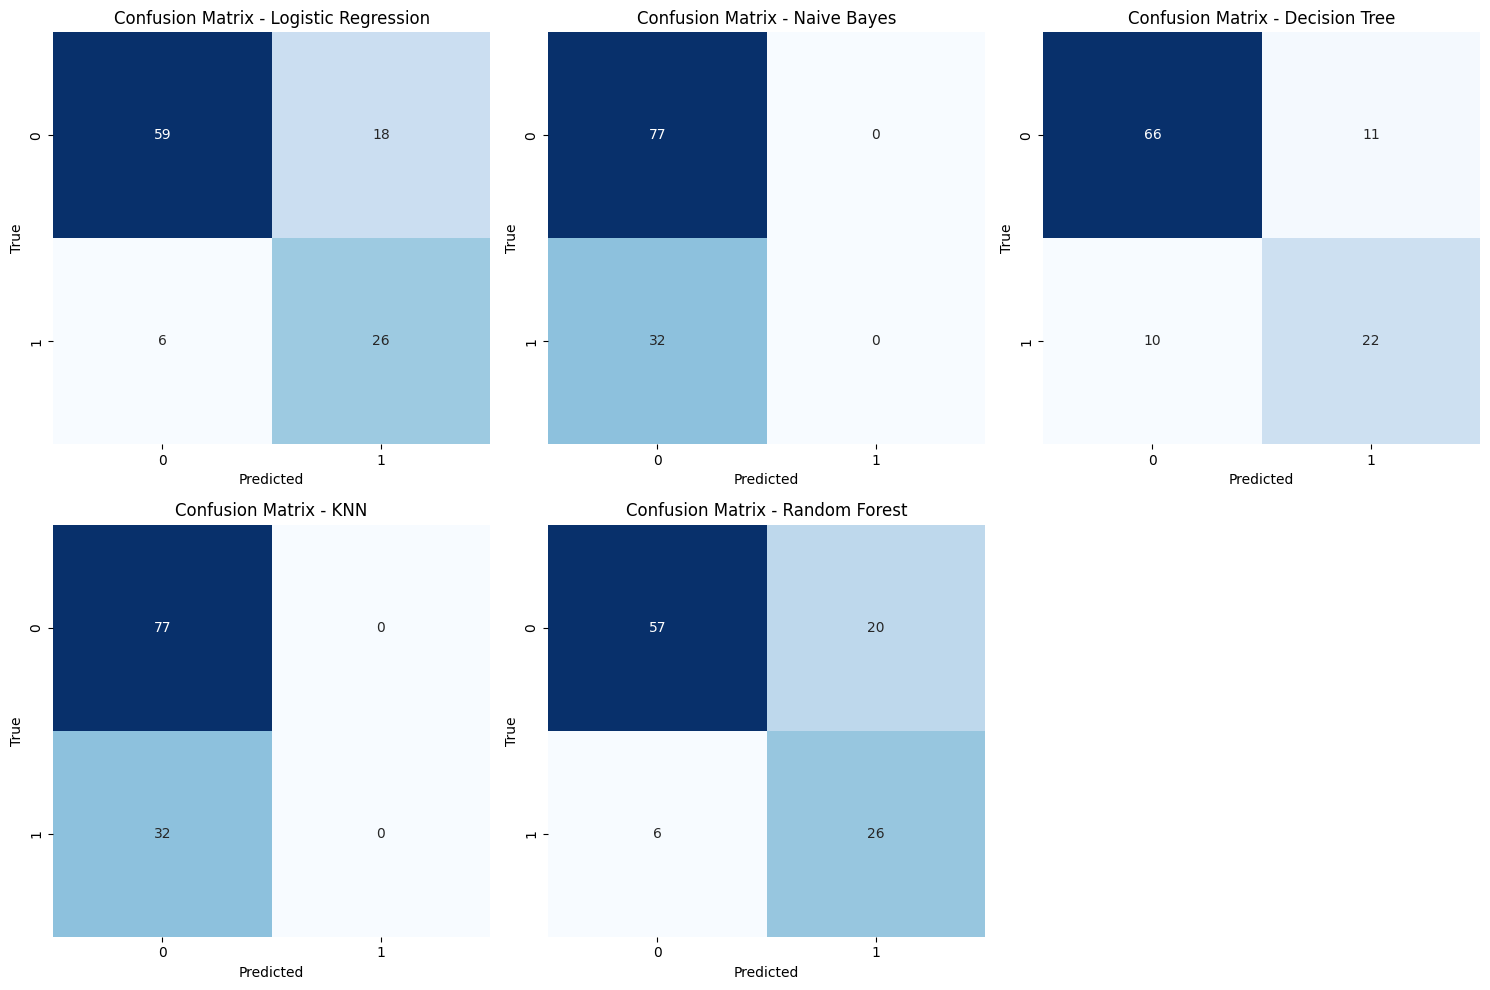

In [144]:
# Draw confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

In [150]:
np.random.seed(42)
for name, model in models.items():
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)  # Assuming models have a 'score' method
        test_accuracy = model.score(X_test, y_test)  # Evaluate on test data
        print(f"Accuracy of {name} :")
        print(f"Training dataset: {train_accuracy:.2f}, Test dataset: {test_accuracy:.2f}")
        print()

Accuracy of Logistic Regression :
Training dataset: 0.94, Test dataset: 0.85

Accuracy of Naive Bayes :
Training dataset: 0.84, Test dataset: 0.78

Accuracy of Decision Tree :
Training dataset: 1.00, Test dataset: 0.83

Accuracy of KNN :
Training dataset: 0.90, Test dataset: 0.85

Accuracy of Random Forest :
Training dataset: 1.00, Test dataset: 0.88

